## 1. Постановка задачи

<center> <img src=https://storage.googleapis.com/kaggle-competitions/kaggle/3333/media/taxi_meter.png align="right" width="300"/> </center>
    
Вам предстоит решить настоящую задачу машинного обучения, направленную на автоматизацию бизнес процессов. Мы построим модель, которая будет предсказывать общую продолжительность поездки такси в Нью-Йорке. 

Представьте вы заказываете такси из одной точки Нью-Йорка в другую, причем не обязательно конечная точка должна находиться в пределах города. Сколько вы должны будете за нее заплатить? Известно, что стоимость такси в США  рассчитывается на основе фиксированной ставки + тарифная стоимость, величина которой зависит от времени и расстояния. Тарифы варьируются в зависимости от города.

В свою очередь время поездки зависит от множества факторов таких как, откуда и куда вы едете, в какое время суток вы совершаете вашу поездку, погодных условий и так далее. 

Таким образом, если мы разработаем алгоритм, способный определять длительность поездки, мы сможем прогнозировать ее стоимость самым тривиальным образом, например, просто умножая стоимость на заданный тариф. 
Сервисы такси хранят огромные объёмы информации о поездках, включая такие данные как конечная, начальная точка маршрута, дата поездки и ее длительность. Эти данные можно использовать для того, чтобы прогнозировать длительность поездки в автоматическом режиме с привлечением искусственного интеллекта.

**Бизнес-задача:** определить характеристики и с их помощью спрогнозировать длительность поездки такси.

**Техническая задача для вас как для специалиста в Data Science:** построить модель машинного обучения, которая на основе предложенных характеристик клиента будет предсказывать числовой признак - время поездки такси. То есть решить задачу регрессии.

**Основные цели проекта:**
1. Сформировать набор данных на основе нескольких источников информации
2. Спроектировать новые признаки с помощью Feature Engineering и выявить наиболее значимые при построении модели
3. Исследовать предоставленные данные и выявить закономерности
4. Построить несколько моделей и выбрать из них наилучшую по заданной метрике
5. Спроектировать процесс предсказания времени длительности поездки для новых данных

Загрузить свое решение на платформу Kaggle, тем самым поучаствовав в настоящем Data Science соревновании.
Во время выполнения проекта вы отработаете навыки работы с несколькими источниками данных, генерации признаков, разведывательного анализа и визуализации данных, отбора признаков и, конечно же, построения моделей машинного обучения!


## 2. Знакомство с данными, базовый анализ и расширение данных

Начнём наше исследование со знакомства с предоставленными данными. А также подгрузим дополнительные источники данных и расширим наш исходный датасет. 


Заранее импортируем модули, которые нам понадобятся для решения задачи:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("pastel")
pd.set_option('display.float_format', '{:.5}'.format)
import plotly.express as px
from scipy import stats
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import cluster
from sklearn import feature_selection

Прочитаем наш файл с исходными данными:

In [2]:
#Чтение данных из файла и вывод первых 5 строк
taxi_data = pd.read_csv("Project5_train_data\\train.csv")
print('Train data shape: {}'.format(taxi_data.shape))
taxi_data.head()

Train data shape: (1458644, 11)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982,40.768,-73.965,40.766,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.98,40.739,-73.999,40.731,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979,40.764,-74.005,40.71,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.01,40.72,-74.012,40.707,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973,40.793,-73.973,40.783,N,435


Итак, у нас с вами есть данные о почти 1.5 миллионах поездок и 11 характеристиках, которые описывают каждую из поездок. 

Мы условно разделили признаки нескольких групп. Каждой из групп мы в дальнейшем уделим отдельное внимание.

**Данные о клиенте и таксопарке:**
* id - уникальный идентификатор поездки
* vendor_id - уникальный идентификатор поставщика (таксопарка), связанного с записью поездки

**Временные характеристики:**
* pickup_datetime - дата и время, когда был включен счетчик поездки
* dropoff_datetime - дата и время, когда счетчик был отключен

**Географическая информация:**
* pickup_longitude -  долгота, на которой был включен счетчик
* pickup_latitude - широта, на которой был включен счетчик
* dropoff_longitude - долгота, на которой счетчик был отключен
* dropoff_latitude - широта, на которой счетчик был отключен

**Прочие признаки:**
* passenger_count - количество пассажиров в транспортном средстве (введенное водителем значение)
* store_and_fwd_flag - флаг, который указывает, сохранилась ли запись о поездке в памяти транспортного средства перед отправкой поставщику. Y - хранить и пересылать, N - не хранить и не пересылать поездку.

**Целевой признак:**
* trip_duration - продолжительность поездки в секундах


Для начала мы проведем базовый анализ того, насколько данные готовы к дальнейшей предобработке и анализу. 

### Задание 2.1
Для начала посмотрим на временные рамки, в которых мы работаем с данными.

Переведите признак pickup_datetime в тип данных datetime с форматом год-месяц-день час:минута:секунда (в функции pd.to_datetime() параметр format='%Y-%m-%d %H:%M:%S'). 

Определите временные рамки (без учета времени), за которые представлены данные.

In [3]:
# ваш код здесь
taxi_data['pickup_datetime'] = pd.to_datetime(taxi_data['pickup_datetime'],format='%Y-%m-%d %H:%M:%S')

### Задание 2.2
Посмотрим на пропуски. 
Сколько пропущенных значений присутствует в данных (суммарно по всем столбцам таблицы)?

In [4]:
# ваш код здесь
taxi_data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

***В данных пропущенных значений не имеется***

### Задание 2.3
Посмотрим на статистические характеристики некоторых признаков. 

а) Сколько уникальных таксопарков присутствует в данных?

б) Каково максимальное количество пассажиров?

в) Чему равна средняя и медианная длительность поездки? Ответ приведите в секундах и округлите до целого.

г) Чему равно минимальное и максимальное время поездки (в секундах)?


In [5]:
# ваш код здесь
taxi_data.describe(include='all')

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
count,1458644,1.4586e+06,1458644,1458644,1.4586e+06,1.4586e+06,1.4586e+06,1.4586e+06,1.4586e+06,1458644,1.4586e+06
unique,1458644,NaN,NaN,1380377,NaN,NaN,NaN,NaN,NaN,2,NaN
top,id1209952,NaN,NaN,2016-05-16 19:40:28,NaN,NaN,NaN,NaN,NaN,N,NaN
freq,1,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,1450599,NaN
mean,NaN,1.535,2016-04-01 10:10:24.940037120,NaN,1.6645,-73.973,40.751,-73.973,40.752,NaN,959.49
min,NaN,1.0,2016-01-01 00:00:17,NaN,0.0,-121.93,34.36,-121.93,32.181,NaN,1.0
25%,NaN,1.0,2016-02-17 16:46:04.249999872,NaN,1.0,-73.992,40.737,-73.991,40.736,NaN,397.0
50%,NaN,2.0,2016-04-01 17:19:40,NaN,1.0,-73.982,40.754,-73.98,40.755,NaN,662.0
75%,NaN,2.0,2016-05-15 03:56:08.750000128,NaN,2.0,-73.967,40.768,-73.963,40.77,NaN,1075.0
max,NaN,2.0,2016-06-30 23:59:39,NaN,9.0,-61.336,51.881,-61.336,43.921,NaN,3.5263e+06


In [6]:
print(f'В данных присутствует {taxi_data["vendor_id"].nunique()} уникальных таксопарков')
print(f'Максимальное количество пассажиров составляет {taxi_data["passenger_count"].max()} человек')
print(f'Средняя длительность поездки составляет {round(taxi_data["trip_duration"].mean())} секунд')
print(f'Медианная длительность поездки составляет {round(taxi_data["trip_duration"].median())} секунд')
print(f'Минимальная длительность поездки составляет {round(taxi_data["trip_duration"].min())} секунд')
print(f'Максимальное длительность поездки составляет {round(taxi_data["trip_duration"].max())} секунд')

В данных присутствует 2 уникальных таксопарков
Максимальное количество пассажиров составляет 9 человек
Средняя длительность поездки составляет 959 секунд
Медианная длительность поездки составляет 662 секунд
Минимальная длительность поездки составляет 1 секунд
Максимальное длительность поездки составляет 3526282 секунд


Займемся расширением исходного набора данных как с помощью внешних источников, так и с помощью манипуляций над имеющимися в данных признаками. 


### Задание 2.4
Реализуйте функцию add_datetime_features(), которая принимает на вход таблицу с данными о поездках (DataFrame) и возвращает ту же таблицу с добавленными в нее 3 столбцами:
* pickup_date - дата включения счетчика - начала поездки (без времени);
* pickup_hour - час дня включения счетчика;
* pickup_day_of_week - порядковый номер дня недели (число), в который был включен счетчик.

а) Сколько поездок было совершено в субботу?

б) Сколько поездок в среднем совершается в день? Ответ округлите до целого

In [7]:
# ваш код здесь
def add_datetime_features(df):
    """Функция преобразует признак pickup_datetime в три
    новых признака: pickup_date - дата включения счетчика - начала поездки (без времени);
                    pickup_hour - час дня включения счетчика;
                    pickup_day_of_week - порядковый номер дня недели (число), в который был включен счетчик."""
    
    df['pickup_date'] = df['pickup_datetime'].dt.date
    df['pickup_hour'] = df['pickup_datetime'].dt.hour
    df['pickup_day_of_week'] = df['pickup_datetime'].dt.dayofweek
    return df
    
    

In [8]:
#применим функция к датафрейму
taxi_data = add_datetime_features(taxi_data)

In [9]:
#выведем количество поездок по дням недели
taxi_data['pickup_day_of_week'].value_counts()

pickup_day_of_week
4    223533
5    220868
3    218574
2    210136
1    202749
6    195366
0    187418
Name: count, dtype: int64

In [10]:
print('Количество поездок в субботу составляет {}'.format(taxi_data['pickup_day_of_week'].value_counts()[1]))
print('В среднем в день совершается {}'.format(round(taxi_data['pickup_date'].value_counts().sum()/taxi_data['pickup_date'].value_counts().shape[0])))

Количество поездок в субботу составляет 202749
В среднем в день совершается 8015


### Задание 2.5
Реализуйте функцию add_holiday_features(), которая принимает на вход две таблицы: 
* таблицу с данными о поездках;
* таблицу с данными о праздничных днях;

и возвращает обновленную таблицу с данными о поездках с добавленным в нее столбцом pickup_holiday - бинарным признаком того, начата ли поездка в праздничный день или нет (1 - да, 0 - нет). 

Чему равна медианная длительность поездки на такси в праздничные дни? Ответ приведите в секундах, округлив до целого.


In [11]:
# ваш код здесь
holiday_data = pd.read_csv('Project5_train_data\holiday_data.csv', sep=';')

In [12]:
def add_holiday_features(df,df1):
    '''Функция принимает на вход две таблицы
       таблицу с данными о поездках;
       таблицу с данными о праздничных днях; 
       и возвращает обновленную таблицу с данными о поездках с добавленным в нее столбцом 
       pickup_holiday - бинарным признаком того, начата ли поездка в праздничный день или нет (1 - да, 0 - нет).'''
    
    df1['date'] = pd.to_datetime(df1['date'])
    df1['date'] = df1['date'].dt.date
    df = pd.merge(df,df1,left_on='pickup_date',right_on='date',how='left')
    df.loc[df['holiday'].isnull(),'holiday'] = 0
    df.loc[df['holiday'] !=0,'holiday'] = 1
    df.drop(columns=['day','date'],inplace=True)
    df.rename(columns={'holiday':'pickup_holiday'},inplace=True)
    return df

In [13]:
#Применим функцию к двум датафреймам
taxi_data = add_holiday_features(taxi_data,holiday_data)

In [14]:
print('Медианная длительность поездки составляет в праздничные дни составляет {}'.format(taxi_data.groupby('pickup_holiday')['trip_duration'].median().round().iloc[1]))

Медианная длительность поездки составляет в праздничные дни составляет 585.0


### Задание 2.6
Реализуйте функцию add_osrm_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными из OSRM;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 3 столбцами:
* total_distance;
* total_travel_time;
* number_of_steps.

а) Чему равна разница (в секундах) между медианной длительностью поездки в данных и медианной длительностью поездки, полученной из OSRM? 

В результате объединения таблиц у вас должны были получиться пропуски в столбцах с информацией из OSRM API. Это связано с тем, что для некоторых поездок не удалось выгрузить данные из веб источника. 

б) Сколько пропусков содержится в столбцах с информацией из OSRM API после объединения таблиц?

In [15]:
# ваш код здесь
osrm_data = pd.read_csv('Project5_train_data\osrm_data_train.csv')

In [16]:
def add_osrm_features(road_df,osrm_df):
    '''Функция принимает на вход две таблицы таблицу с данными о поездках;
       таблицу с данными из OSRM;
       и возвращает обновленную таблицу с данными о поездках с добавленными в нее 3 столбцами:
       total_distance;
       total_travel_time;
       number_of_steps.'''
    
    osrm_df.drop(columns=[col for col in osrm_df.columns if col not in ('id','total_distance','total_travel_time','number_of_steps')],inplace=True)
    road_df = pd.merge(road_df,osrm_df,how='left',left_on ='id',right_on='id')
    return road_df

In [17]:
#Применение функции к датафрейму
taxi_data = add_osrm_features(taxi_data,osrm_data)

In [18]:
print(f'Разница в секундах между медианной длительностью поездки в данных и медианной длительностью поездки, полученной из OSRM составляет {round(taxi_data["trip_duration"].median() - taxi_data["total_travel_time"].median())}')

Разница в секундах между медианной длительностью поездки в данных и медианной длительностью поездки, полученной из OSRM составляет 372


In [19]:
taxi_data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
pickup_date           0
pickup_hour           0
pickup_day_of_week    0
pickup_holiday        0
total_distance        1
total_travel_time     1
number_of_steps       1
dtype: int64

***После объеденения таблиц содержатся 3 пропуска***

In [20]:
def get_haversine_distance(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # радиус земли в километрах
    EARTH_RADIUS = 6371 
    # считаем кратчайшее расстояние h по формуле Хаверсина
    lat_delta = lat2 - lat1
    lng_delta = lng2 - lng1
    d = np.sin(lat_delta * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng_delta * 0.5) ** 2
    h = 2 * EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

def get_angle_direction(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # считаем угол направления движения alpha по формуле угла пеленга
    lng_delta_rad = lng2 - lng1
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    alpha = np.degrees(np.arctan2(y, x))
    return alpha

### Задание 2.7.
Реализуйте функцию add_geographical_features(), которая принимает на вход таблицу с данными о поездках и возвращает обновленную таблицу с добавленными в нее 2 столбцами:
* haversine_distance - расстояние Хаверсина между точкой, в которой был включен счетчик, и точкой, в которой счетчик был выключен;
* direction - направление движения из точки, в которой был включен счетчик, в точку, в которой счетчик был выключен.

Чему равно медианное расстояние Хаверсина поездок (в киллометрах)? Ответ округлите до сотых.


In [21]:
# ваш код здесь
def add_geographical_features(df):
    '''Функция  принимает на вход таблицу с данными о поездках 
    и возвращает обновленную таблицу с добавленными в нее 2 столбцами:
    haversine_distance - расстояние Хаверсина между точкой, в которой был включен счетчик, и точкой, в которой счетчик был выключен;
    direction - направление движения из точки, в которой был включен счетчик, в точку, в которой счетчик был выключен.'''
    
    df['haversine_distance'] = get_haversine_distance(df['pickup_latitude'],df['pickup_longitude'],df['dropoff_latitude'],df['dropoff_longitude'])
    df['direction'] = get_angle_direction(df['pickup_latitude'],df['pickup_longitude'],df['dropoff_latitude'],df['dropoff_longitude'])
    return df

In [22]:
#Применим функцию к датафрейму
taxi_data = add_geographical_features(taxi_data)
print('Медианное расстояние  расстояние Хаверсина поездок составляет {}'.format(round(taxi_data['haversine_distance'].median(),2)))

Медианное расстояние  расстояние Хаверсина поездок составляет 2.09


### Задание 2.8.
Реализуйте функцию add_cluster_features(), которая принимает на вход таблицу с данными о поездках и обученный алгоритм кластеризации. Функция должна возвращать обновленную таблицу с добавленными в нее столбцом geo_cluster - географический кластер, к которому относится поездка.

Сколько поездок содержится в наименьшем по размеру географическом кластере?


In [91]:

def add_cluster_features(df):
    # Создаём обучающую выборку из географических координат всех точек
    coords = np.hstack((df[['pickup_latitude', 'pickup_longitude']],
                    df[['dropoff_latitude', 'dropoff_longitude']]))
    # Обучаем алгоритм кластеризации
    kmeans = cluster.KMeans(n_clusters=10, random_state=42)
    kmeans.fit(coords)
    # ваш код здесь
    df['geo_cluster'] = kmeans.predict(coords)
    return df 

taxi_data = add_cluster_features(taxi_data)
taxi_data['geo_cluster'].value_counts()

geo_cluster
7    508283
1    465623
4    324366
0     64532
6     47603
3     32844
8     14960
9        16
5         4
2         2
Name: count, dtype: int64

### Задание 2.9.
Реализуйте функцию add_weather_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными о погодных условиях на каждый час;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 5 столбцами:
* temperature - температура;
* visibility - видимость;
* wind speed - средняя скорость ветра;
* precip - количество осадков;
* events - погодные явления.

а) Сколько поездок было совершено в снежную погоду?

В результате объединения у вас должны получиться записи, для которых в столбцах temperature, visibility, wind speed, precip, и events будут пропуски. Это связано с тем, что в таблице с данными о погодных условиях отсутствуют измерения для некоторых моментов времени, в которых включался счетчик поездки. 

б) Сколько процентов от общего количества наблюдений в таблице с данными о поездках занимают пропуски в столбцах с погодными условиями? Ответ приведите с точностью до сотых процента.


In [24]:
# ваш код здесь
weather_data = pd.read_csv('Project5_train_data\weather_data.csv')

In [25]:
def add_weather_features(taxi_df,weather_df):
    '''Функция принимает на вход две таблицы:
      таблицу с данными о поездках;
      таблицу с данными о погодных условиях на каждый час;

      и возвращает обновленную таблицу с данными о поездках с добавленными в нее 5 столбцами:
      temperature - температура;
      visibility - видимость;
      wind speed - средняя скорость ветра;
      precip - количество осадков;
      events - погодные явления.'''
    
    weather_df.drop(columns = [col for col in weather_df.columns if col not in ('date','hour','temperature','visibility', 'wind speed','precip','events')],inplace=True)
    weather_df['date'] = pd.to_datetime(weather_df['date'])
    taxi_df['pickup_date'] = pd.to_datetime(taxi_df['pickup_date'])
    taxi_df = pd.merge(taxi_df,weather_df,how='left',left_on=['pickup_date','pickup_hour'], right_on=['date','hour'])
    taxi_df.drop(columns=['date','hour'],inplace=True)
    return taxi_df

In [26]:
#Применим функцию к датафрейму
taxi_data = add_weather_features(taxi_data,weather_data)

In [27]:
taxi_data['events'].value_counts()

events
Rain    58300
Snow    13126
Fog         1
Name: count, dtype: int64

In [28]:
round(taxi_data.isnull().mean() * 100,2)

id                    0.0
vendor_id             0.0
pickup_datetime       0.0
dropoff_datetime      0.0
passenger_count       0.0
pickup_longitude      0.0
pickup_latitude       0.0
dropoff_longitude     0.0
dropoff_latitude      0.0
store_and_fwd_flag    0.0
trip_duration         0.0
pickup_date           0.0
pickup_hour           0.0
pickup_day_of_week    0.0
pickup_holiday        0.0
total_distance        0.0
total_travel_time     0.0
number_of_steps       0.0
haversine_distance    0.0
direction             0.0
geo_cluster           0.0
temperature          0.82
visibility           0.82
wind speed           0.82
precip               0.82
events               95.1
dtype: float64

***Доля пропусков в общем количестве наблюдений в таблице с данными о поездках занимают пропуски в столбцах с погодными условиями 0.82%***

### Задание 2.10.
Реализуйте функцию fill_null_weather_data(), которая принимает на вход которая принимает на вход таблицу с данными о поездках. Функция должна заполнять пропущенные значения в столбцах.

Пропуски в столбцах с погодными условиями -  temperature, visibility, wind speed, precip заполните медианным значением температуры, влажности, скорости ветра и видимости в зависимости от даты начала поездки. Для этого сгруппируйте данные по столбцу pickup_date и рассчитайте медиану в каждой группе, после чего с помощью комбинации методов transform() и fillna() заполните пропуски. 
Пропуски в столбце events заполните строкой 'None' - символом отсутствия погодных явлений (снега/дождя/тумана). 

Пропуски в столбцах с информацией из OSRM API - total_distance, total_travel_time и number_of_steps заполните медианным значением по столбцам. 

Чему равна медиана в столбце temperature после заполнения пропусков? Ответ округлите до десятых.


In [29]:
# ваш код здесь
def fill_null_weather_data(df):
    '''Функция принимает на вход таблицу с данными о поездках, заполняет пропущенные значения в столбцах.

       Пропуски в столбцах с погодными условиями (temperature, visibility, wind speed, precip) заполните медианным значением температуры, 
       видимости, скорости ветра и количества осадков в зависимости от даты начала поездки. Для этого данные были сгруппированы по столбцу pickup_date 
       и рассчитана медиана в каждой группе, после чего с помощью комбинации методов transform() и fillna() заполнены пропуски.
       '''
    
    weather_cols = [col for col in df.columns if col in ('temperature', 'visibility', 'wind speed', 'precip')]
    OSRM_cols = [col for col in df.columns if col in ('total_distance', 'total_travel_time', 'number_of_steps')]
    for col in df.columns:
        if col in weather_cols:
            df[col] = df[col].fillna(df.groupby('pickup_date')[col].transform('median'))
        elif col in OSRM_cols:
            df[col] = df[col].fillna(df[col].median())
        elif col == 'events':
            df.fillna({'events':'None'},inplace=True)
    return df

In [30]:
#Применяем функцию к датафрейму
taxi_data = fill_null_weather_data(taxi_data)

In [31]:
print('Медиана в столбце temperature составляет {}'.format(taxi_data["temperature"].median()))

Медиана в столбце temperature составляет 11.1


В завершение первой части найдем очевидные выбросы в целевой переменной - длительности поездки. 

Проще всего найти слишком продолжительные поездки. Давайте условимся, что выбросами будут считаться поездки, длительность которых превышает 24 часа. 

Чуть сложнее с анализом поездок, длительность которых слишком мала. Потому что к ним относятся действительно реальные поездки на короткие расстояния, поездки, которые были отменены через секунду после того как включился счетчик, а также “телепортации” - перемещение на большие расстояния за считанные секунды. 
Условимся, что мы будем считать выбросами только последнюю группу. Как же нам их обнаружить наиболее простым способом?

Можно воспользоваться информацией о кратчайшем расстоянии, которое проезжает такси. Вычислить среднюю скорость автомобиля на кратчайшем пути следующим образом: 
$$avg\_speed= \frac{total\_distance}{1000*trip\_duration}*3600$$
Если мы построим диаграмму рассеяния средней скорости движения автомобилей, мы увидим следующую картину:


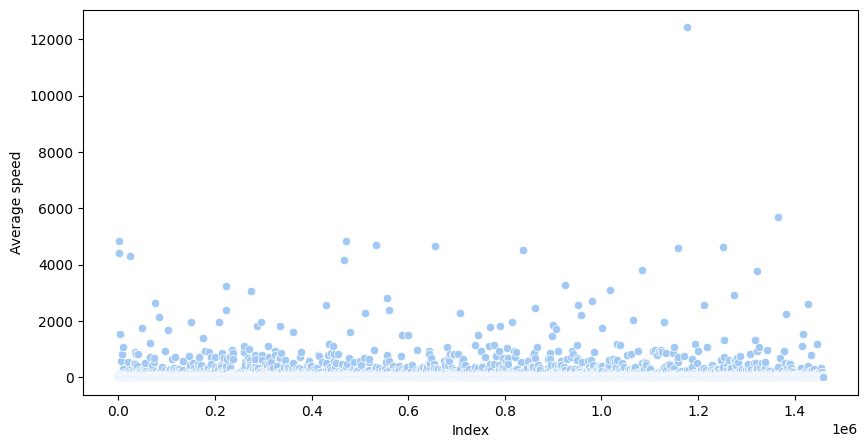

In [32]:
#Вычислиv среднюю скорость автомобиля на кратчайшем пути 
avg_speed = taxi_data['total_distance'] / taxi_data['trip_duration'] * 3.6

#Отрисуем график ь диаграмму рассеяния средней скорости движения автомобилей
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x=avg_speed.index, y=avg_speed, ax=ax)
ax.set_xlabel('Index')
ax.set_ylabel('Average speed');

Как раз отсюда мы видим, что у нас есть “поездки-телепортации”, для которых средняя скорость более 1000 км/ч. Даже есть такая, средняя скорость которой составляла более 12000 км/ч! 

Давайте условимся, что предельная средняя скорость, которую могут развивать таксисты будет 300 км/ч. 


### Задание 2.11.
Найдите поездки, длительность которых превышает 24 часа. И удалите их из набора данных.

а) Сколько выбросов по признаку длительности поездки вам удалось найти?

Найдите поездки, средняя скорость которых по кратчайшему пути превышает 300 км/ч и удалите их из данных. 

б) Сколько выбросов по признаку скорости вам удалось найти?

In [33]:
# поездки, длительность которых превышает 24 часа
duration_more_then_24 = taxi_data[taxi_data['trip_duration'] / 8640 >24]

# поездки, средняя скорость которых по кратчайшему пути превышает 300 км/ч
avg_speed_more_then_300 = taxi_data[(taxi_data['total_distance'] / (1000 * taxi_data['trip_duration'])) * 3600 > 300]

In [34]:
print('Найдены выбросы в количестве по признаку длительности поездки в количестве {}'.format(duration_more_then_24.shape[0]))
print('Найдены выбросы по признаку скорости в количестве {}'.format(avg_speed_more_then_300.shape[0]))

Найдены выбросы в количестве по признаку длительности поездки в количестве 4
Найдены выбросы по признаку скорости в количестве 407


In [35]:
#Удаляем выбросы из набора данных
taxi_data.drop(index = duration_more_then_24.index, inplace=True)
taxi_data.drop(index=avg_speed_more_then_300.index,inplace=True)

## 3. Разведывательный анализ данных (EDA)

В этой части нашего проекта мы с вами:
* Исследуем сформированный набор данных; 
* Попробуем найти закономерности, позволяющие сформулировать предварительные гипотезы относительно того, какие факторы являются решающими в определении длительности поездки;
* Дополним наш анализ визуализациями, иллюстрирующими; исследование. Постарайтесь оформлять диаграммы с душой, а не «для галочки»: навыки визуализации полученных выводов обязательно пригодятся вам в будущем.


Начинаем с целевого признака. Забегая вперед, скажем, что основной метрикой качества решения поставленной задачи будет RMSLE - Root Mean Squared Log Error, которая вычисляется на основе целевой переменной в логарифмическом масштабе. В таком случае целесообразно сразу логарифмировать признак длительности поездки и рассматривать при анализе логарифм в качестве целевого признака:
$$trip\_duration\_log = log(trip\_duration+1),$$
где под символом log подразумевается натуральный логарифм.


In [36]:
#Логарифмируем признаки
taxi_data['trip_duration_log'] = np.log(taxi_data['trip_duration']+1)

### Задание 3.1.
Постройте гистограмму и коробчатую диаграмму длительности поездок в логарифмическом масштабе (trip_duration_log). 
Исходя из визуализации, сделайте предположение, является ли полученное распределение нормальным? 
Проверьте свою гипотезу с помощью теста Д’Агостино при уровне значимости $\alpha=0.05$. 

а) Чему равен вычисленный p-value? Ответ округлите до сотых.

б) Является ли распределение длительности поездок в логарифмическом масштабе нормальным?

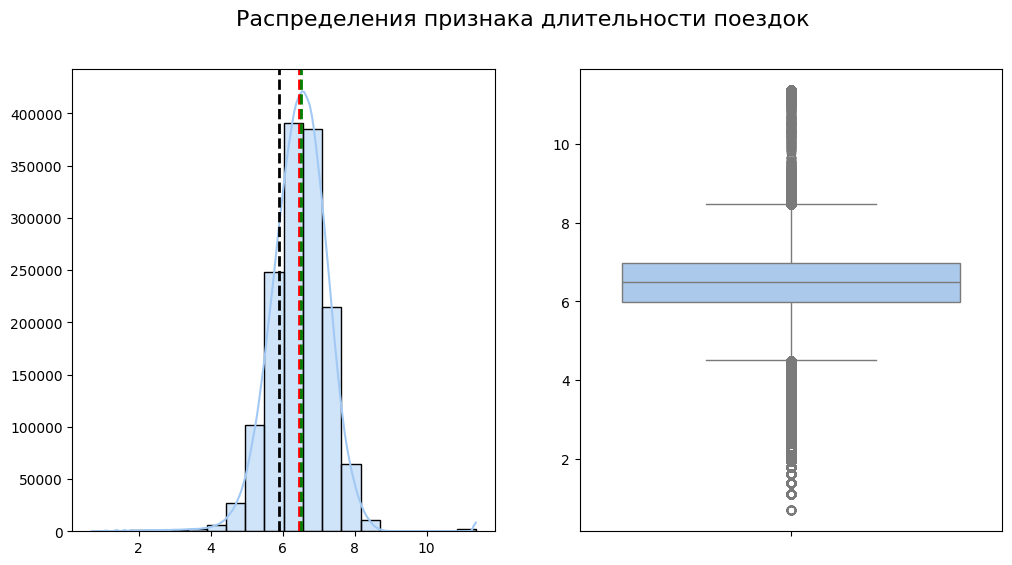

In [37]:
# ваш код здесь
fig, axes = plt.subplots(figsize=(12,6),nrows=1,ncols=2)
#Построим гистограмму и коробчатую диаграмму длительности поездок в логарифмическом масштабе (trip_duration_log)
sns.histplot(taxi_data['trip_duration_log'], bins = 20, kde=True, ax = axes[0])
axes[0].set_xlabel('')
axes[0].axvline(np.mean(taxi_data['trip_duration_log']), linestyle='dashed',color='red',linewidth=2, label='Среднее')
axes[0].axvline(np.median(taxi_data['trip_duration_log']), linestyle='dashed',color='green',linewidth=2, label='Медиана')
axes[0].axvline(stats.mode(taxi_data['trip_duration_log'])[0], color='black', linestyle='dashed', linewidth=2, label='Мода')
axes[0].set_ylabel('')

sns.boxplot(taxi_data['trip_duration_log'], ax = axes[1])
axes[1].set_xlabel('')
axes[1].set_ylabel('')

plt.suptitle('Распределения признака длительности поездок', fontsize=16)
plt.show()

***По графику на первый взгляд, распределение выглядит похоже на нормальное, однако если добавить линии моды, медианы и среднего, мы видим, что мода не равна медиане и среднему значению***

In [38]:
statistic, p_value = stats.normaltest(taxi_data['trip_duration_log'])

alpha = 0.05

print(f'p_value составляет {p_value}')

if p_value < alpha:
    print('Есть основание отвергнуть нулевую гипотезу о нормальности распределения')
else:
    print('Нет оснований отвергнуть нулевую гипотезу о том что данные распределены нормально')

p_value составляет 0.0
Есть основание отвергнуть нулевую гипотезу о нормальности распределения


***С помощью теста Д’Агостино при уровне значимости $\alpha=0.05$ можно понять, что данные не распределены нормально***

### Задание 3.2.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от таксопарка (vendor_id). 

Сравните два распределения между собой.

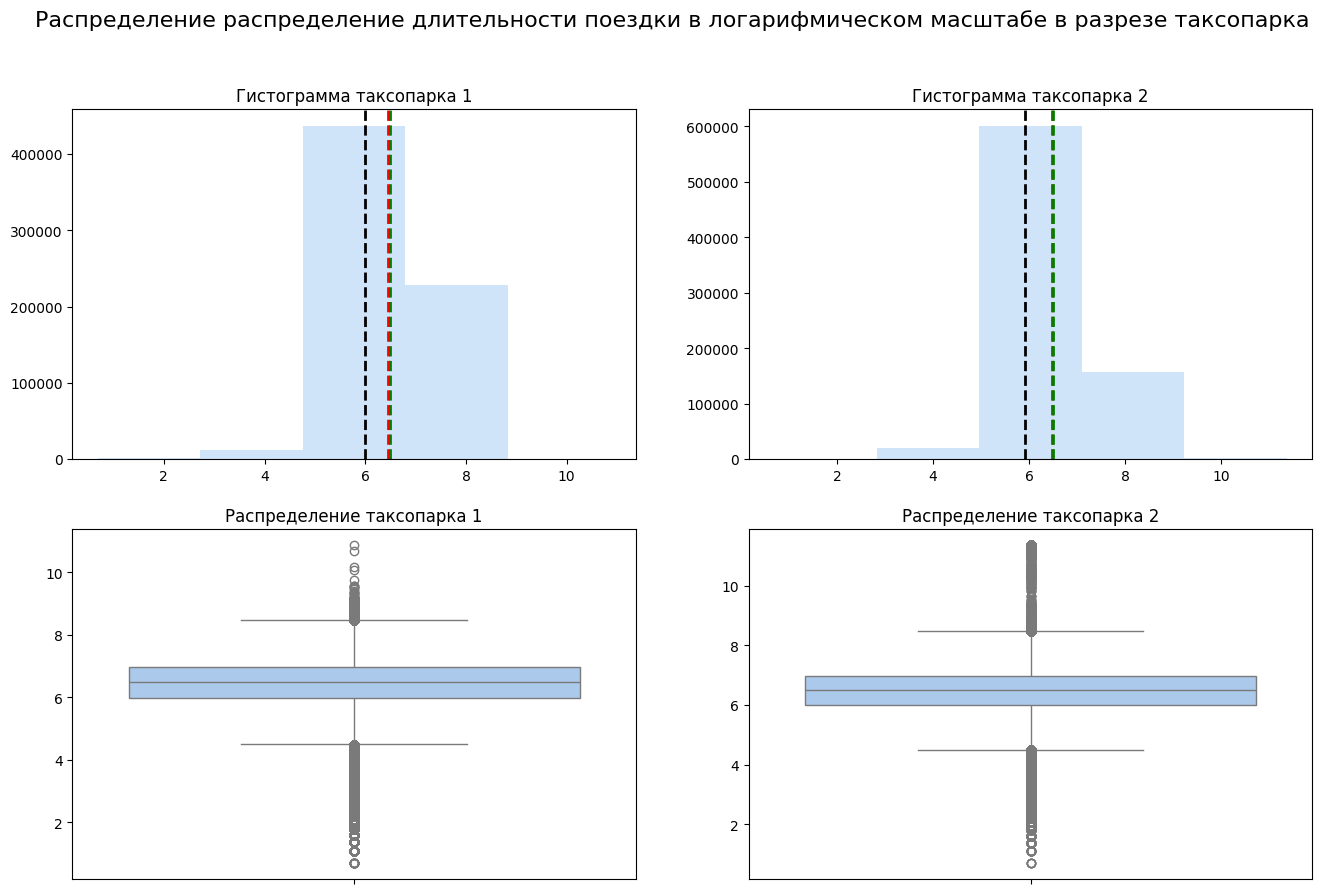

In [39]:
# ваш код здесь
#Разделим данные на две выборки в зависимости от таксопарка
vendor_one = taxi_data[taxi_data['vendor_id'] == 1]['trip_duration_log']
vendor_two = taxi_data[taxi_data['vendor_id'] == 2]['trip_duration_log']

#Построим графики сравнения распределения длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от таксопарка (vendor_id)
fig, axes = plt.subplots(2,2, figsize=(16,10))
axes[0][0].hist(vendor_one,alpha=0.5,bins=5)
axes[0][0].axvline(np.mean(vendor_one), color='red', linestyle='dashed', linewidth=2, label='Среднее')
axes[0][0].axvline(np.median(vendor_one), color='green', linestyle='dashed', linewidth=2, label='Медиана')
axes[0][0].axvline(stats.mode(vendor_one)[0], color='black', linestyle='dashed', linewidth=2, label='Мода')
axes[0][0].set_title('Гистограмма таксопарка 1')

axes[0][1].hist(vendor_two,alpha=0.5,bins=5)
axes[0][1].set_title('Гистограмма таксопарка 2')
axes[0][1].axvline(np.mean(vendor_two), color='red', linestyle='dashed', linewidth=2, label='Среднее')
axes[0][1].axvline(np.median(vendor_two), color='green', linestyle='dashed', linewidth=2, label='Медиана')
axes[0][1].axvline(stats.mode(vendor_two)[0], color='black', linestyle='dashed', linewidth=2, label='Мода')

sns.boxplot(vendor_one,ax=axes[1][0])
axes[1][0].set_title('Распределение таксопарка 1')
axes[1][0].set_ylabel('')

sns.boxplot(vendor_two,ax=axes[1][1])
axes[1][1].set_title('Распределение таксопарка 2')
axes[1][1].set_ylabel('')

plt.suptitle('Распределение распределение длительности поездки в логарифмическом масштабе в разрезе таксопарка',fontsize=16)
plt.show()

***Можно заметить, что распределения в группах практически не отличаются, признак vendor_id не имеет значения при определении длительности поездки.***

### Задание 3.3.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от признака отправки сообщения поставщику (store_and_fwd_flag). 

Сравните два распределения между собой.

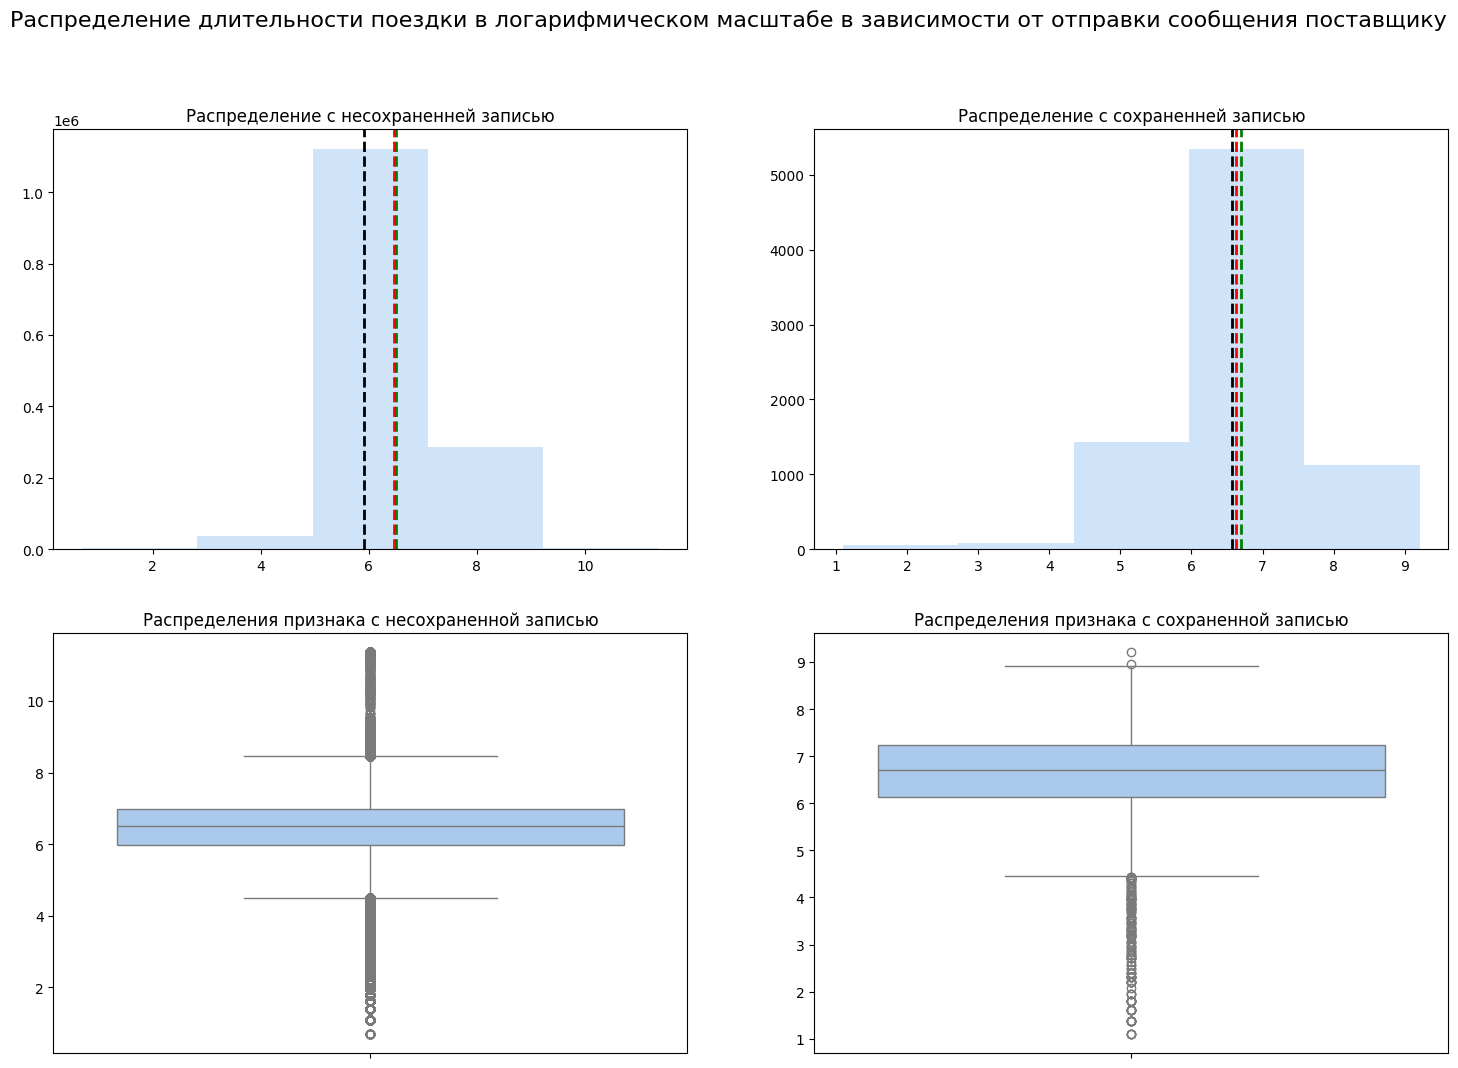

In [40]:
# ваш код здесь
N_flag = taxi_data[taxi_data['store_and_fwd_flag'] =='N']['trip_duration_log']
Y_flag = taxi_data[taxi_data['store_and_fwd_flag'] =='Y']['trip_duration_log']

fig,axes = plt.subplots(nrows = 2,ncols=2,figsize=(18,12))
axes[0][0].hist(N_flag, alpha=0.5,bins=5)
axes[0][0].axvline(np.mean(N_flag),color='red',linestyle = 'dashed',linewidth=2,label='Среднее')
axes[0][0].axvline(np.median(N_flag),color='green',linestyle = 'dashed',linewidth=2,label='Медиана')
axes[0][0].axvline(stats.mode(N_flag)[0],color='black',linestyle = 'dashed',linewidth=2,label='Мода')
axes[0][0].set_title('Распределение с несохраненней записью')

axes[0][1].hist(Y_flag, alpha=0.5,bins=5)
axes[0][1].axvline(np.mean(Y_flag),color='red',linestyle = 'dashed',linewidth=2,label='Среднее')
axes[0][1].axvline(np.median(Y_flag),color='green',linestyle = 'dashed',linewidth=2,label='Медиана')
axes[0][1].axvline(stats.mode(Y_flag)[0],color='black',linestyle = 'dashed',linewidth=2,label='Мода')
axes[0][1].set_title('Распределение с сохраненней записью')

sns.boxplot(N_flag,ax=axes[1][0])
axes[1][0].set_title('Распределения признака с несохраненной записью')
axes[1][0].set_ylabel('')

sns.boxplot(Y_flag,ax=axes[1][1])
axes[1][1].set_title('Распределения признака с сохраненной записью')
axes[1][1].set_ylabel('')

plt.suptitle('Распределение длительности поездки в логарифмическом масштабе в зависимости от отправки сообщения поставщику',fontsize=16)
plt.show()

### Задание 3.4.
Постройте две визуализации:
* Распределение количества поездок в зависимости от часа дня;
* Зависимость медианной длительности поездки от часа дня.

На основе построенных графиков ответьте на следующие вопросы:

а) В какое время суток такси заказывают реже всего?

б) В какое время суток наблюдается пик медианной длительности поездок?

C:\Users\Насим\AppData\Local\Temp\ipykernel_9560\854530626.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(new_data, x='duration', y='pickup_hour',palette='muted')


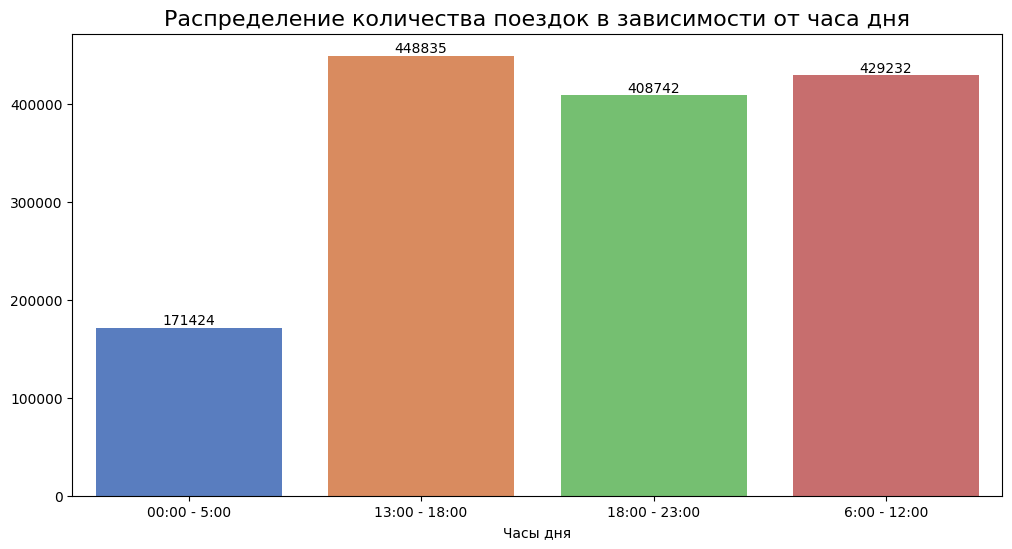

In [41]:
def set_duration(duration):
    if duration in range(0,6):
        return '00:00 - 5:00'
    elif duration in range(6,13):
        return '6:00 - 12:00'
    elif duration in range(13,19):
        return '13:00 - 18:00'
    else:
        return '18:00 - 23:00'
    
new = taxi_data.copy()

new['duration'] = new['pickup_hour'].apply(set_duration)

new_data = new.groupby('duration')['pickup_hour'].count().to_frame().reset_index()

plt.figure(figsize=(12,6))
bar = sns.barplot(new_data, x='duration', y='pickup_hour',palette='muted')
for i in bar.patches:
    height = round(i.get_height(), 2)
    bar.annotate(f'{height:.0f}', 
                      (i.get_x() + i.get_width() / 2., i.get_height()), 
                      ha='center', va='bottom')
bar.set_ylabel('')
bar.set_xlabel('Часы дня')
bar.set_title('Распределение количества поездок в зависимости от часа дня',fontsize=16)
plt.show()



***Можно заметить, что реже всего такси заказывают с 00:00 по 5:00. а больше всего с 13:00 до 18:00*** 

C:\Users\Насим\AppData\Local\Temp\ipykernel_30192\2821995201.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(median_trip, x='duration', y='trip_duration_log',palette='muted')


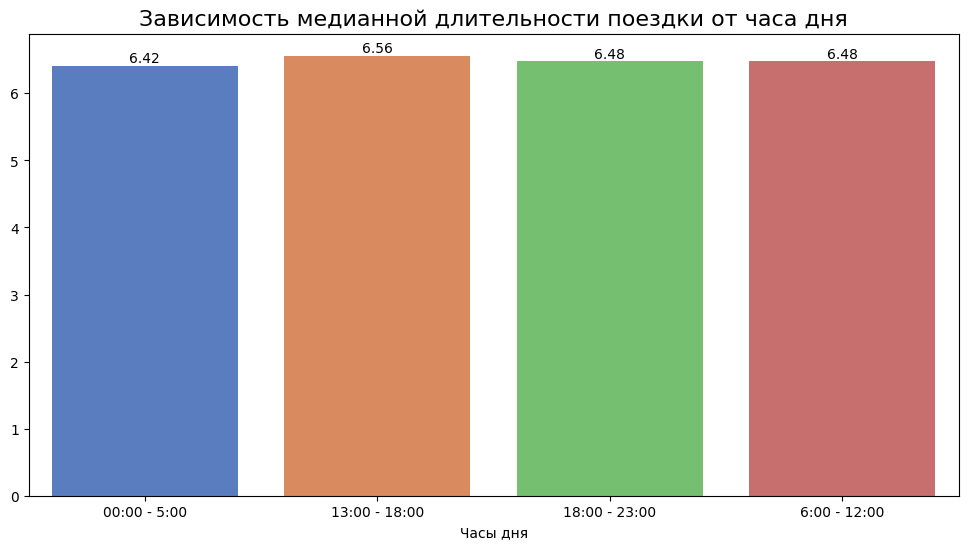

In [45]:
median_trip = new.groupby('duration')['trip_duration_log'].median().to_frame().reset_index()

plt.figure(figsize=(12,6))
bar = sns.barplot(median_trip, x='duration', y='trip_duration_log',palette='muted')
for i in bar.patches:
    height = round(i.get_height(), 2)
    bar.annotate(f'{height:.2f}', 
                      (i.get_x() + i.get_width() / 2., i.get_height()), 
                      ha='center', va='bottom')
bar.set_ylabel('')
bar.set_xlabel('Часы дня')
bar.set_title('Зависимость медианной длительности поездки от часа дня',fontsize=16)
plt.show()

***Нельзя сказать что медианная активность различается в какие-то определенные периоды времени, но все же немного больше с 13:00 до 18:00***

### Задание 3.5.
Постройте две визуализации:
* Распределение количества поездок в зависимости от дня недели;
*  Зависимость медианной длительности поездки от дня недели.

На основе построенных графиков ответьте на следующие вопросы:
а) В какой день недели совершается больше всего поездок?
б) В какой день недели медианная длительность поездок наименьшая?


C:\Users\Насим\AppData\Local\Temp\ipykernel_9560\4088061744.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count = sns.countplot(data=taxi_data,x='pickup_day_of_week',palette='muted')


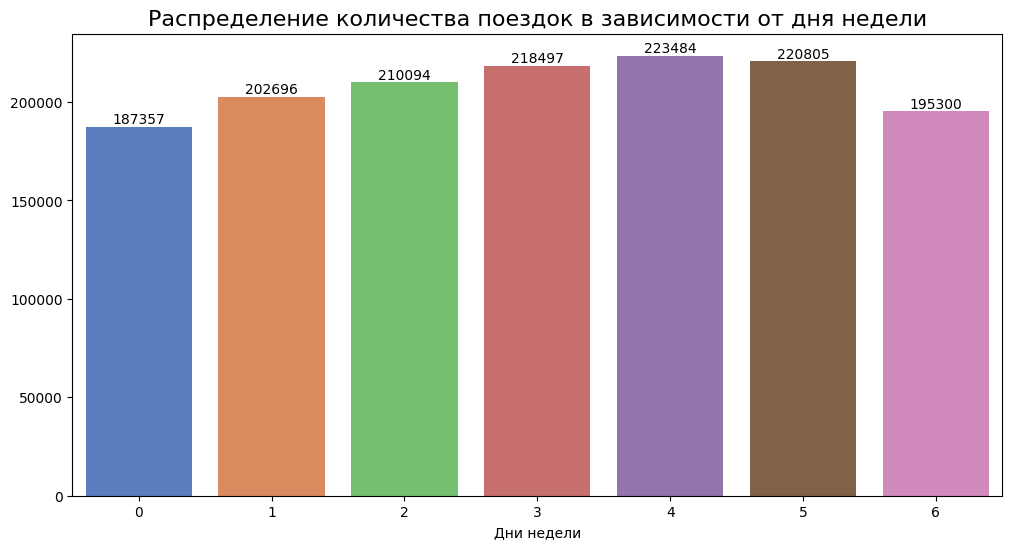

In [42]:
# ваш код здесь
plt.figure(figsize=(12,6))
count = sns.countplot(data=taxi_data,x='pickup_day_of_week',palette='muted')
for i in count.patches:
    height = round(i.get_height(), 2)
    count.annotate(f'{height:.0f}', 
                      (i.get_x() + i.get_width() / 2., i.get_height()), 
                      ha='center', va='bottom')
count.set_ylabel('')
count.set_xlabel('Дни недели')
count.set_title('Распределение количества поездок в зависимости от дня недели',fontsize=16)
plt.show()

***В пятницу совершается больше всего поездок, меньше всего в понедельник***

C:\Users\Насим\AppData\Local\Temp\ipykernel_9560\3641142067.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(dayOfweek, x='pickup_day_of_week', y='trip_duration_log',palette='muted')


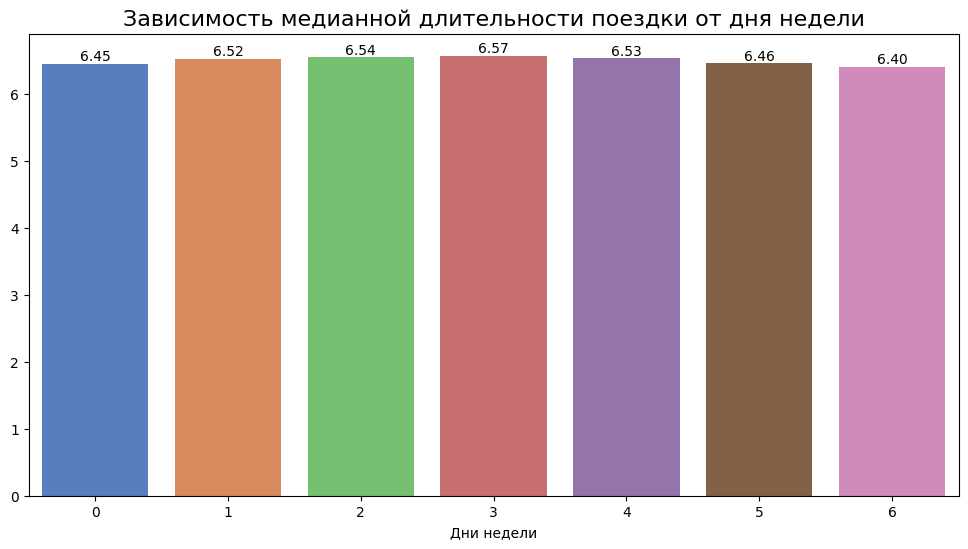

In [43]:
dayOfweek = new.groupby('pickup_day_of_week')['trip_duration_log'].median().to_frame().reset_index()

plt.figure(figsize=(12,6))
bar = sns.barplot(dayOfweek, x='pickup_day_of_week', y='trip_duration_log',palette='muted')
for i in bar.patches:
    height = round(i.get_height(), 2)
    bar.annotate(f'{height:.2f}', 
                      (i.get_x() + i.get_width() / 2., i.get_height()), 
                      ha='center', va='bottom')
bar.set_ylabel('')
bar.set_xlabel('Дни недели')
bar.set_title('Зависимость медианной длительности поездки от дня недели',fontsize=16)
plt.show()

***Медианная длительность поездок наименьшая в воскресенье***

### Задание 3.6.
Посмотрим на обе временные характеристики одновременно. 

Постройте сводную таблицу, по строкам которой отложены часы (pickup_hour), по столбцам - дни недели (pickup_day_of_week), а в ячейках - медианная длительность поездки (trip_duration). 

Визуализируйте полученную сводную таблицу с помощью тепловой карты (рекомендуемая палитра - coolwarm).

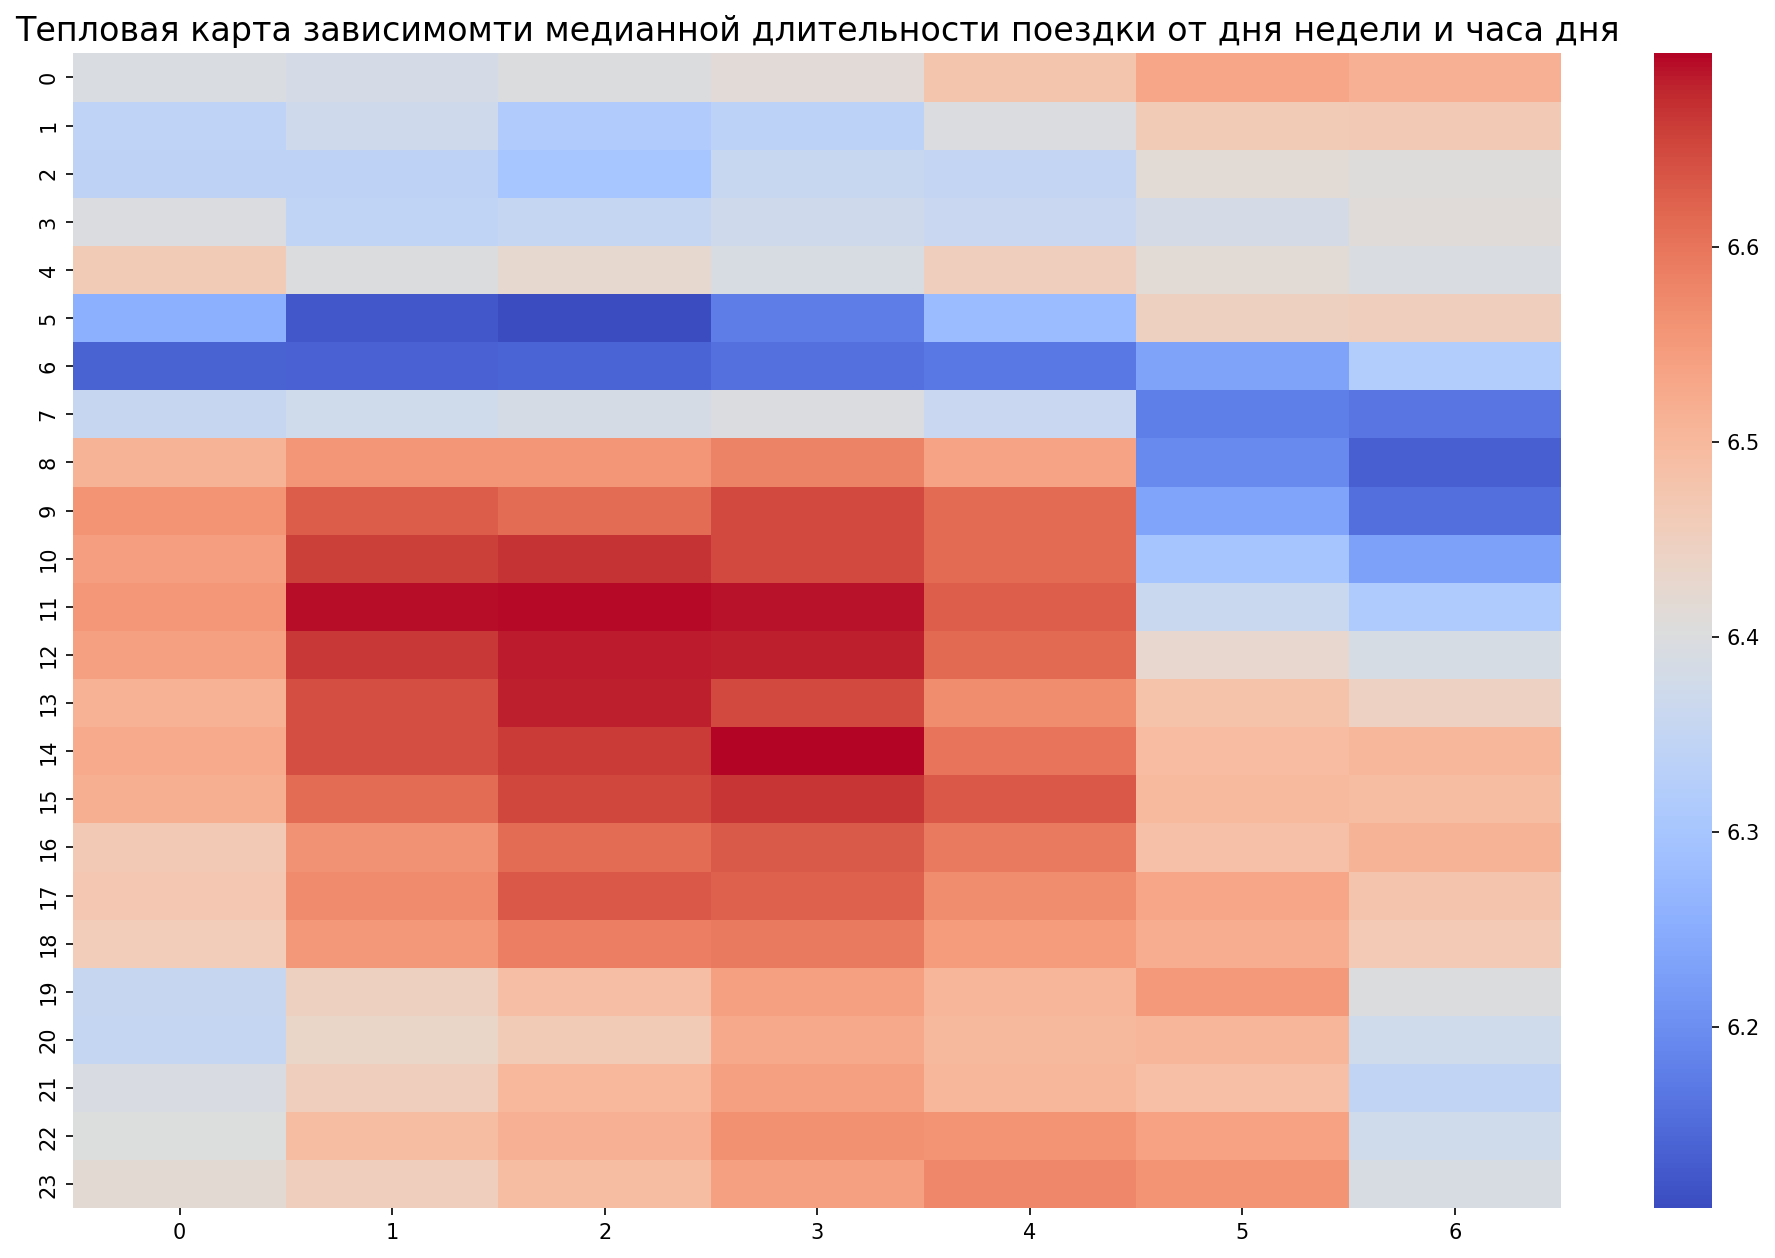

In [44]:
# ваш код здесь
plt.figure(figsize=(16,10),dpi=150)
pivot_table = taxi_data.pivot_table(values='trip_duration_log',index='pickup_hour', columns='pickup_day_of_week', aggfunc='median')
sns.heatmap(pivot_table,cmap='coolwarm')
plt.xlabel('')
plt.ylabel('')
plt.title('Тепловая карта зависимомти медианной длительности поездки от дня недели и часа дня',fontsize=16)
plt.show()

***Самые продолжительные поездки (в медианном смысле) наблюдаются с понедельника по пятницу в промежутке с 8 до 18 часов. Наибольшая медианная длительность поездки наблюдалась в четверг в 14 часов дня.***

### Задание 3.7.
Постройте две диаграммы рассеяния (scatter-диаграммы):
* первая должна иллюстрировать географическое расположение точек начала поездок (pickup_longitude, pickup_latitude) 
* вторая должна географическое расположение точек завершения поездок (dropoff_longitude, dropoff_latitude).

Для этого на диаграммах по оси абсцисс отложите широту (longitude), а по оси ординат - долготу (latitude). 
Включите в визуализацию только те точки, которые находятся в пределах Нью-Йорка - добавьте следующие ограничения на границы осей абсцисс и ординат:
 
city_long_border = (-74.03, -73.75)

city_lat_border = (40.63, 40.85)

Добавьте на диаграммы расцветку по десяти географическим кластерам (geo_cluster), которые мы сгенерировали ранее. 

**Рекомендация:** для наглядности уменьшите размер точек на диаграмме рассеяния.  


In [45]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

# ваш код здесь

pickup_filtered = taxi_data[
    (taxi_data['pickup_longitude'] >= city_long_border[0]) &
    (taxi_data['pickup_longitude'] <= city_long_border[1]) &
    (taxi_data['pickup_latitude'] >= city_lat_border[0]) &
    (taxi_data['pickup_latitude'] <= city_lat_border[1])
]

dropoff_filtered = taxi_data[
    (taxi_data['dropoff_longitude'] >= city_long_border[0]) &
    (taxi_data['dropoff_longitude'] <= city_long_border[1]) &
    (taxi_data['dropoff_latitude'] >= city_lat_border[0]) &
    (taxi_data['dropoff_latitude'] <= city_lat_border[1])
]


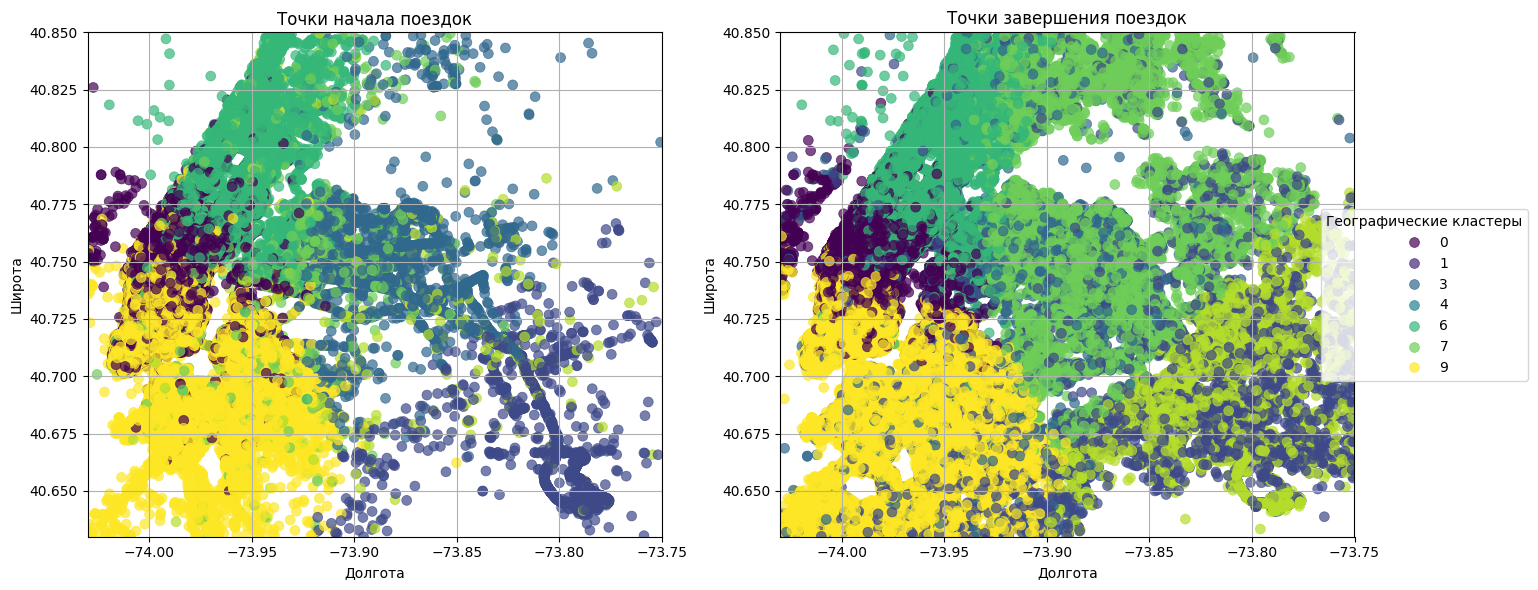

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Создание диаграммы рассеяния для точек начала поездок
sns.scatterplot(data=pickup_filtered,x='pickup_longitude', y='pickup_latitude',hue='geo_cluster', palette='viridis', s=50, alpha=0.7, edgecolor=None, ax=axes[0])
axes[0].set_title('Точки начала поездок')
axes[0].set_xlim(city_long_border)
axes[0].set_ylim(city_lat_border)
axes[0].set_xlabel('Долгота')
axes[0].set_ylabel('Широта')
axes[0].grid()

# Создание диаграммы рассеяния для точек завершения поездок
sns.scatterplot(data=dropoff_filtered, x='dropoff_longitude', y='dropoff_latitude', hue='geo_cluster', palette='viridis', s=50, alpha=0.7, edgecolor=None, ax=axes[1]
)
axes[1].set_title('Точки завершения поездок')
axes[1].set_xlim(city_long_border)
axes[1].set_ylim(city_lat_border)
axes[1].set_xlabel('Долгота')
axes[1].set_ylabel('Широта')
axes[1].grid()

axes[0].legend_.remove()
axes[1].legend_.remove()
# Настройка легенды
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right', bbox_to_anchor=(1.1, 0.5), title='Географические кластеры')

plt.tight_layout()
plt.show()


## 4. Отбор и преобразование признаков

Перед тем как перейти к построению модели, осталось сделать ещё несколько шагов.
* Следует помнить, что многие алгоритмы машинного обучения не могут обрабатывать категориальные признаки в их обычном виде. Поэтому нам необходимо их закодировать;
* Надо отобрать признаки, которые мы будем использовать для обучения модели;
*  Необходимо масштабировать и трансформировать некоторые признаки для того, чтобы улучшить сходимость моделей, в основе которых лежат численные методы.


In [47]:
print('Shape of data: {}'.format(taxi_data.shape))
print('Columns: {}'.format(taxi_data.columns))

Shape of data: (1458233, 27)
Columns: Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_date', 'pickup_hour', 'pickup_day_of_week',
       'pickup_holiday', 'total_distance', 'total_travel_time',
       'number_of_steps', 'haversine_distance', 'direction', 'geo_cluster',
       'temperature', 'visibility', 'wind speed', 'precip', 'events',
       'trip_duration_log'],
      dtype='object')


Для удобства работы сделаем копию исходной таблицы с поездками:

In [48]:
train_data = taxi_data.copy()
train_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,number_of_steps,haversine_distance,direction,geo_cluster,temperature,visibility,wind speed,precip,events,trip_duration_log
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982,40.768,-73.965,40.766,N,...,5.0,1.4985,99.97,6,4.4,8.0,27.8,0.3,None,6.1225
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.98,40.739,-73.999,40.731,N,...,6.0,1.8055,-117.15,9,28.9,16.1,7.4,0.0,None,6.4983
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979,40.764,-74.005,40.71,N,...,16.0,6.3851,-159.68,9,-6.7,16.1,24.1,0.0,None,7.6615
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.01,40.72,-74.012,40.707,N,...,4.0,1.4855,-172.74,9,7.2,16.1,25.9,0.0,None,6.0638
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973,40.793,-73.973,40.783,N,...,5.0,1.1886,179.47,6,9.4,16.1,9.3,0.0,None,6.0776


### Задание 4.1.
Сразу позаботимся об очевидных неинформативных и избыточных признаках. 

а) Какой из признаков является уникальным для каждой поездки и не несет полезной информации в определении ее продолжительности?

б) Утечка данных (data leak) - это…

в) Подумайте, наличие какого из признаков в обучающем наборе данных создает утечку данных?

г) Исключите выбранные в пунктах а) и в) признаки из исходной таблицы с данными. Сколько столбцов в таблице у вас осталось?


1) **Признак id является уникальным для каждой поездки и не несет полезной информации для набора данных.**
2) **Утечка данных - это ситуация, в которой данные, используемые для обучения модели, содержат прямую или косвенную информацию о целевой переменной.**
3) **Это признак 'dropoff_datetime**

In [49]:
# ваш код здесь
train_data.drop(columns=['id','dropoff_datetime'],inplace=True)

Ранее мы извлекли всю необходимую для нас информацию из даты начала поездки, теперь мы можем избавиться от этих признаков, так как они нам больше не понадобятся:


In [50]:
drop_columns = ['pickup_datetime', 'pickup_date']
train_data = train_data.drop(drop_columns, axis=1)
print('Shape of data:  {}'.format(train_data.shape))

Shape of data:  (1458233, 23)


### Задание 4.2.

Закодируйте признак vendor_id в таблице train_data таким образом, чтобы он был равен 0, если идентификатор таксопарка равен 1, и 1 — в противном случае.

Закодируйте признак store_and_fwd_flag в таблице train_data таким образом, чтобы он был равен 0, если флаг выставлен в значение 'N', и 1 — в противном случае.

а) Рассчитайте среднее по закодированному столбцу vendor_id. Ответ приведите с точностью до сотых.

б) Рассчитайте среднее по закодированному столбцу store_and_fwd_flag. Ответ приведите с точностью до тысячных.



In [51]:
# ваш код здесь
train_data['vendor_id'] = train_data['vendor_id'].apply(lambda x: 0 if x==1 else 1)
train_data['store_and_fwd_flag'] = train_data['store_and_fwd_flag'].apply(lambda x: 0 if x=='N' else 1)


In [52]:
print(f"Cреднее по закодированному столбцу vendor_id {np.round(train_data['vendor_id'].mean(),2)}")
print(f"Cреднее по закодированному столбцу store_and_fwd_flag {np.round(sum(train_data['store_and_fwd_flag'])/train_data.shape[0],3)}")

Cреднее по закодированному столбцу vendor_id 0.53
Cреднее по закодированному столбцу store_and_fwd_flag 0.006


### Задание 4.3.
Создайте таблицу data_onehot из закодированных однократным кодированием признаков pickup_day_of_week, geo_cluster и events в таблице train_data с помощью OneHotEncoder из библиотеки sklearn. Параметр drop выставите в значение 'first', чтобы удалять первый бинарный столбец, тем самым не создавая излишних признаков.

В параметре handle_unknown установите значение 'ignore'. Это позволит коду отработать без ошибок в случае появления в тестовой выборке значений, отсутствующих в обучающей выборке.

В результате работы OneHotEncoder вы получите безымянный numpy-массив, который нам будет необходимо преобразовать обратно в DataFrame, для более удобной работы в дальнейшем. Чтобы получить имена закодированных столбцов у объекта типа OneHotEncoder есть специальный метод get_feature_names_out(). Он возвращает список новых закодированных имен столбцов в формате <оригинальное имя столбца>_<имя категории>.

Пример использования:

``` python
# Объявляем кодировщик
one_hot_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
# Получаем закодированные имена столбцов
column_names = one_hot_encoder.get_feature_names_out()
# Составляем DataFrame из закодированных признаков
data_onehot = pd.DataFrame(data_onehot, columns=column_names)
```

В этом псевдокоде:
* one_hot_encoder - объект класса OneHotEncoder
* data_onehot - numpy-массив, полученный в результате трансформации кодировщиком

В результате выполнения задания у вас должен быть образован DataFrame `data_onehot`, который содержит кодированные категориальные признаки pickup_day_of_week, geo_cluster и events. 


Сколько бинарных столбцов у вас получилось сгенерировать с помощью однократного кодирования?


In [54]:
# ваш код здесь
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(drop='first',handle_unknown='ignore',sparse_output=False)
data_onehot = one_hot_encoder.fit_transform(train_data[['pickup_day_of_week', 'geo_cluster','events']])
columns_name = one_hot_encoder.get_feature_names_out(train_data[['pickup_day_of_week', 'geo_cluster','events']].columns)
data_onehot = pd.DataFrame(data_onehot,columns=columns_name)
print(f'Получилось сгенерировать с помощью однократного кодирования {data_onehot.shape[1]} бинарных столбцов')

Получилось сгенерировать с помощью однократного кодирования 18 бинарных столбцов


Добавим полученную таблицу с закодированными признаками:

In [55]:
columns_to_change = train_data[['pickup_day_of_week', 'geo_cluster','events']].columns
train_data = pd.concat(
    [train_data.reset_index(drop=True).drop(columns_to_change, axis=1), data_onehot], 
    axis=1
)
print('Shape of data: {}'.format(train_data.shape))

Shape of data: (1458233, 38)


Теперь, когда категориальные признаки предобработаны, сформируем матрицу наблюдений X, вектор целевой переменной y и его логарифм y_log. В матрицу наблюдений войдут все столбцы из таблицы с поездками за исключением целевого признака trip_duration и его логарифмированной версии trip_duration_log:


In [56]:
X = train_data.drop(['trip_duration', 'trip_duration_log'], axis=1)
y = train_data['trip_duration']
y_log = train_data['trip_duration_log']

Все наши модели мы будем обучать на логарифмированной версии y_log. 

Выбранный тип валидации - hold-out. Разобьем выборку на обучающую и валидационную в соотношении 67/33:

In [57]:
X_train, X_valid, y_train_log, y_valid_log = model_selection.train_test_split(
    X, y_log, 
    test_size=0.33, 
    random_state=42
)

На данный момент у нас достаточно много признаков: скорее всего, не все из них будут важны. Давайте оставим лишь те, которые сильнее всего связаны с целевой переменной и точно будут вносить вклад в повышение качества модели.


### Задание 4.4.
С помощью SelectKBest отберите 25 признаков, наилучшим образом подходящих для предсказания целевой переменной в логарифмическом масштабе. Отбор реализуйте по обучающей выборке, используя параметр score_func = f_regression.

Укажите признаки, которые вошли в список отобранных


In [58]:
# ваш код здесь
from sklearn.feature_selection import SelectKBest, f_regression

selektor = SelectKBest(score_func=f_regression,k=25)
selektor.fit(X_train,y_train_log)
selectors = selektor.get_feature_names_out()

In [59]:
#Оставим те признаки, сильнее всего связанные с целевой переменной
X_train, X_valid = X_train[selectors], X_valid[selectors]

Так как мы будем использовать различные модели, в том числе внутри которых заложены численные методы оптимизации, то давайте заранее позаботимся о масштабировании факторов. 


### Задание 4.5.

Нормализуйте предикторы в обучающей и валидационной выборках с помощью MinMaxScaler из библиотеки sklearn. Помните, что обучение нормализатора производится на обучающей выборке, а трансформация на обучающей и валидационной!

Рассчитайте среднее арифметическое для первого предиктора (т.е. для первого столбца матрицы) из валидационной выборки. Ответ округлите до сотых.


In [60]:
# ваш код здесь
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_valid_scaler = scaler.transform(X_valid)

In [61]:
#Переведем матрицы в Датафреймы
X_train_scaler = pd.DataFrame(X_train_scaler, columns = scaler.get_feature_names_out())
X_valid_scaler = pd.DataFrame(X_valid_scaler,columns = scaler.get_feature_names_out())

In [62]:
print(f"Среднее арифметическое для первого предиктора (т. е. для первого столбца матрицы) из валидационной выборки {np.round(X_valid_scaler.iloc[:,0].mean(),2)}")

Среднее арифметическое для первого предиктора (т. е. для первого столбца матрицы) из валидационной выборки 0.54


## 5. Решение задачи регрессии: линейная регрессия и деревья решений

Определим метрику, по которой мы будем измерять качество наших моделей. Мы будем следовать канонам исходного соревнования на Kaggle и в качестве метрики использовать RMSLE (Root Mean Squared Log Error), которая вычисляется как:
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(log(y_i+1)-log(\hat{y_i}+1))^2},$$
где:
* $y_i$ - истинная длительность i-ой поездки на такси (trip_duration)
* $\hat{y_i}$- предсказанная моделью длительность i-ой поездки на такси

Заметим, что логарифмирование целевого признака мы уже провели заранее, поэтому нам будет достаточно вычислить метрику RMSE для модели, обученной прогнозировать длительность поездки такси в логарифмическом масштабе:
$$z_i=log(y_i+1),$$
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(z_i-\hat{z_i})^2}=\sqrt{MSE(z_i,\hat{z_i})}$$ 



### Задание 5.1.
Постройте модель линейной регрессии на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [ ]:
# ваш код здесь
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
lr = LinearRegression()
lr.fit(X_train_scaler,y_train_log)
y_train_pred = lr.predict(X_train_scaler) 
y_val_pred = lr.predict(X_valid_scaler)
print(f"Метрика RMSLE на тренировочной выборке {round(root_mean_squared_error(y_train_log,y_train_pred),2)}")
print(f"Метрика RMSLE на валидационной выборке {round(root_mean_squared_error(y_valid_log,y_val_pred),2)}")

Метрика RMSLE на тренировочной выборке 0.54
Метрика на валидационной выборке 0.54


### Задание 5.2.
Сгенерируйте полиномиальные признаки 2-ой степени с помощью PolynomialFeatures из библиотеки sklearn. Параметр include_bias выставите в значение False.

Постройте модель полиномиальной регрессии 2-ой степени на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


In [64]:
# ваш код здесь
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2,include_bias=False)

X_train_poly = poly_features.fit_transform(X_train_scaler)
X_valid_poly = poly_features.transform(X_valid_scaler)

lr = LinearRegression()
lr.fit(X_train_poly,y_train_log)
y_train_pred = lr.predict(X_train_poly)
y_val_pred = lr.predict(X_valid_poly)

print(f"Метрика RMSLE на тренировочной выборке {round(root_mean_squared_error(y_train_log,y_train_pred),2)}")
print(f"Метрика RMSLE на валидационной выборке {round(root_mean_squared_error(y_valid_log,y_val_pred),2)}")

Метрика RMSLE на тренировочной выборке 0.47
Метрика RMSLE на валидационной выборке 0.69


***У модели наблюдаются признаки переобучения***

### Задание 5.3.
Постройте модель полиномиальной регрессии 2-ой степени с L2-регуляризацией (регуляризация по Тихонову) на обучающей выборке  (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Коэффициент регуляризации $\alpha$ установите равным 1, остальные параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [65]:
# ваш код здесь
from sklearn.linear_model import Ridge

ridge_lr = Ridge(alpha=1)

ridge_lr.fit(X_train_poly,y_train_log)

y_train_pred = ridge_lr.predict(X_train_poly) 
y_val_pred = ridge_lr.predict(X_valid_poly)
print(f"Метрика RMSLE на тренировочной выборке {round(root_mean_squared_error(y_train_log,y_train_pred),2)}")
print(f"Метрика RMSLE на валидационной выборке {round(root_mean_squared_error(y_valid_log,y_val_pred),2)}")

Метрика RMSLE на тренировочной выборке 0.48
Метрика RMSLE на валидационной выборке 0.48


### Задание 5.4.
Постройте модель дерева решений (DecisionTreeRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию. 

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


In [66]:
# ваш код здесь
from sklearn.tree import DecisionTreeRegressor

desicion_tree = DecisionTreeRegressor()
desicion_tree.fit(X_train_scaler,y_train_log)
y_train_pred = desicion_tree.predict(X_train_scaler)
y_val_pred=desicion_tree.predict(X_valid_scaler)
print(f"Метрика RMSLE на тренировочной выборке {round(root_mean_squared_error(y_train_log,y_train_pred),2)}")
print(f"Метрика RMSLE на валидационной выборке {round(root_mean_squared_error(y_valid_log,y_val_pred),2)}")

Метрика RMSLE на тренировочной выборке 0.0
Метрика RMSLE на валидационной выборке 0.56


### Задание 5.5.
Переберите все возможные варианты глубины дерева решений в диапазоне от 7 до 20:

max_depths = range(7, 20)

Параметр random_state задайте равным 42.

Постройте линейные графики изменения метрики RMSE на тренировочной и валидационной выборках в зависимости от значения параметра глубины дерева решений. 

а) Найдите оптимальное значение максимальной глубины дерева, для которой будет наблюдаться минимальное значение RMSLE на обучающей выборке, но при этом еще не будет наблюдаться переобучение (валидационная кривая еще не начинает возрастать).

б) Чему равно значение метрик RMSLE на тренировочной и валидационной выборках для дерева решений с выбранной оптимальной глубиной? Ответ округлите до сотых.


In [67]:
# ваш код здесь
#Отберем метрики для обучающей и валидационной метрики в зависимости от изменения параметра глубины дерева
train_rmsle=[]
val_rmsle=[]

for depth in range(7,20):
   desicion_tree = DecisionTreeRegressor(random_state=42,max_depth=depth)
   desicion_tree.fit(X_train_scaler,y_train_log)
   y_train_pred = desicion_tree.predict(X_train_scaler)
   y_val_pred=desicion_tree.predict(X_valid_scaler)
   train_rmsle.append(np.round(root_mean_squared_error(y_train_log,y_train_pred),2))
   val_rmsle.append(np.round(root_mean_squared_error(y_valid_log,y_val_pred),2))

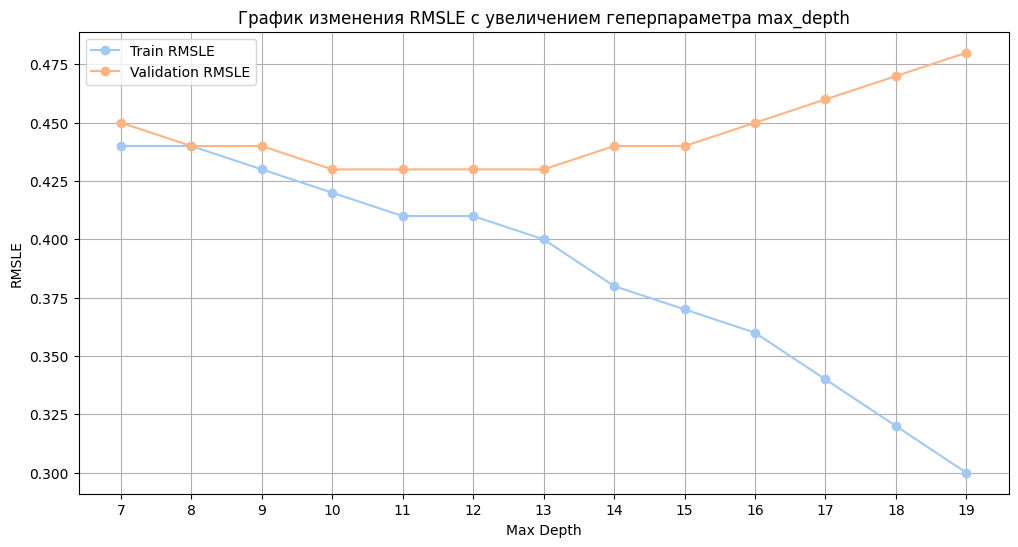

In [69]:
#Построим графики на основе отобранных значений метрик RMSLE
plt.figure(figsize=(12,6))
plt.plot(range(7,20),train_rmsle, label='Train RMSLE', marker='o')
plt.plot(range(7,20),val_rmsle, label='Validation RMSLE', marker='o')
plt.title('График изменения RMSLE с увеличением геперпараметра max_depth')
plt.xlabel('Max Depth')
plt.ylabel('RMSLE')
plt.xticks(range(7,20))
plt.legend()
plt.grid()
plt.show()

In [70]:
desicion_tree = DecisionTreeRegressor(random_state=42,max_depth=12)
desicion_tree.fit(X_train_scaler,y_train_log)
y_train_pred = desicion_tree.predict(X_train_scaler)
y_val_pred=desicion_tree.predict(X_valid_scaler)
print(f"Метрика RMSLE на тренировочной выборке {round(root_mean_squared_error(y_train_log,y_train_pred),2)}")
print(f"Метрика RMSLE на валидационной выборке {round(root_mean_squared_error(y_valid_log,y_val_pred),2)}")

Метрика RMSLE на тренировочной выборке 0.41
Метрика RMSLE на валидационной выборке 0.43


## 6. Решение задачи регрессии: ансамблевые методы и построение прогноза

Переходим к тяжелой артиллерии: ансамблевым алгоритмам. 

### Задание 6.1.

Постройте модель случайного леса на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* n_estimators=200,
* max_depth=12,
* criterion='squared_error',
* min_samples_split=20,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [73]:
# ваш код здесь
from sklearn.ensemble import RandomForestRegressor
desicion_tree = RandomForestRegressor(n_estimators=200, max_depth=12,criterion='squared_error',min_samples_split=20,random_state=42)
desicion_tree.fit(X_train_scaler,y_train_log)
y_train_pred = desicion_tree.predict(X_train_scaler)
y_val_pred = desicion_tree.predict(X_valid_scaler)
print(f"Метрика RMSLE на тренировочной выборке {round(root_mean_squared_error(y_train_log,y_train_pred),2)}")
print(f"Метрика RMSLE на валидационной выборке {round(root_mean_squared_error(y_valid_log,y_val_pred),2)}")

Метрика RMSLE на тренировочной выборке 0.4
Метрика RMSLE на валидационной выборке 0.41


### Задание 6.2.
Постройте модель градиентного бустинга над деревьями решений (GradientBoostingRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* learning_rate=0.5,
* n_estimators=100,
* max_depth=6, 
* min_samples_split=30,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [75]:
# ваш код здесь
from sklearn.ensemble import GradientBoostingRegressor

GradBoostRegressor = GradientBoostingRegressor(learning_rate=0.5,n_estimators=100,max_depth=6,min_samples_split=30,random_state=42)
GradBoostRegressor.fit(X_train_scaler,y_train_log)
y_train_pred = GradBoostRegressor.predict(X_train_scaler)
y_val_pred = GradBoostRegressor.predict(X_valid_scaler)
print(f"Метрика RMSLE на тренировочной выборке {round(root_mean_squared_error(y_train_log,y_train_pred),2)}")
print(f"Метрика RMSLE на валидационной выборке {round(root_mean_squared_error(y_valid_log,y_val_pred),2)}")

Метрика RMSLE на тренировочной выборке 0.37
Метрика RMSLE на валидационной выборке 0.39


### Задание 6.3.
Какая из построенных вами моделей показала наилучший результат (наименьшее значение RMSLE на валидационной выборке)?
* Линейная регрессия
* Полиномиальная регрессия 2ой степени
* Дерево решений
* Случайный лес
* Градиентный бустинг над деревьями решений


Наилучший результат показала модель градиентного бустинга над деревьями решений с нименьшим значением метрики RMSLE на валидационной выборке 0.39

### Задание 6.4.
Постройте столбчатую диаграмму коэффициентов значимости каждого из факторов.

Укажите топ-3 наиболее значимых для предсказания целевого признака - длительности поездки в логарифмическом масштабе - факторов.


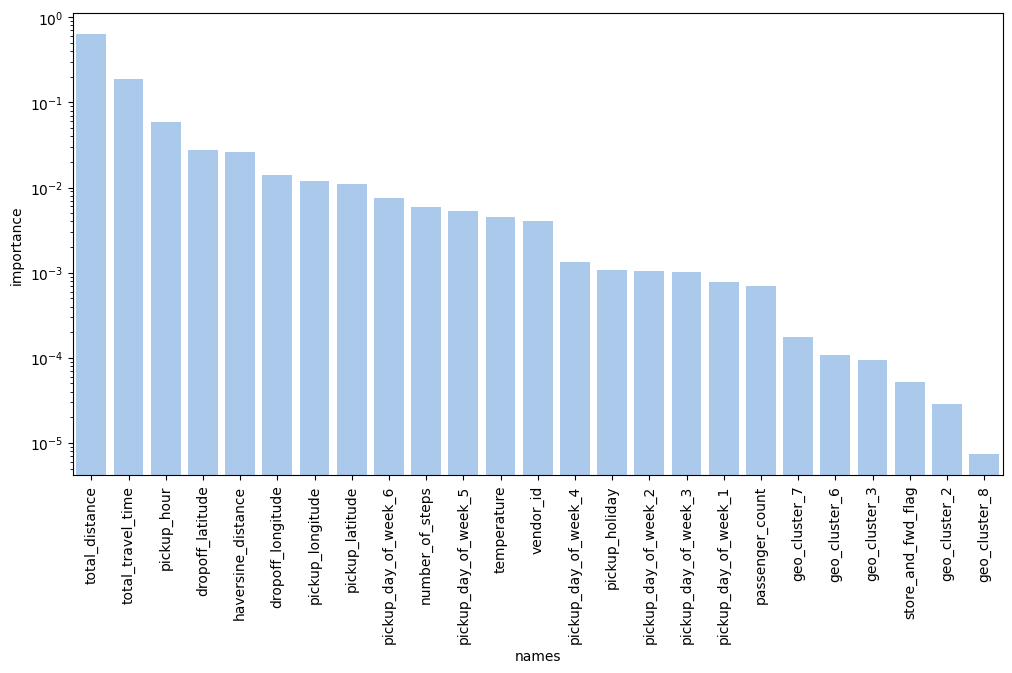

In [76]:
# ваш код здесь
importance_data = pd.DataFrame({'names':GradBoostRegressor.feature_names_in_,'importance': GradBoostRegressor.feature_importances_ }).sort_values(by='importance',ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(data=importance_data,x='names',y='importance')
plt.xticks(rotation=90)
plt.yscale('log')

Топ-3 наиболее значимых для предсказания целевого признака - длительности поездки в логарифмическом масштабе

In [79]:
importance_data['names'].iloc[:3]

9        total_distance
10    total_travel_time
7           pickup_hour
Name: names, dtype: object

### Задание 6.5.
Для лучшей из построенных моделей рассчитайте медианную абсолютную ошибку (MeAE - в sklearn функция median_absolute_error) предсказания длительности поездки такси на валидационной выборке:
$$ MeAE = median(|y_i-\hat{y_i}|)$$

Значение метрики MeAE переведите в минуты и округлите до десятых.


In [80]:
# ваш код здесь
from sklearn.metrics import median_absolute_error

y_val_pred = np.exp(y_val_pred) - 1
y_valid_log = np.exp(y_valid_log) - 1

metrica = median_absolute_error(y_val_pred,y_valid_log)

In [84]:
print(f'Значение метрики MeAE в минутах составляет {round(metrica /60,1)}')

Значение метрики MeAE в минутах составляет 1.8


Финальный шаг - сделать submit -  предсказание для отложенного тестового набора данных. 

Прочитаем тестовые данные и заранее выделим столбец с идентификаторами поездок из тестового набора данных. Он нам еще пригодится:


In [95]:
test_data = pd.read_csv("Project5_test_data\Project5_test_data.csv")
osrm_data_test = pd.read_csv("Project5_test_data\Project5_osrm_data_test.csv")
test_id = test_data['id']

Перед созданием прогноза для тестовой выборки необходимо произвести все манипуляции с данными, которые мы производили с тренировочной выборкой, а именно:
* Перевести признак pickup_datetime в формат datetime;
* Добавить новые признаки (временные, географические, погодные и другие факторы);
* Произвести очистку данных от пропусков;
* Произвести кодировку категориальных признаков:
    * Закодировать бинарные признаки;
    * Закодировать номинальные признаки с помощью обученного на тренировочной выборке OneHotEncoder’а;
* Сформировать матрицу наблюдений, оставив в таблице только те признаки, которые были отобраны с помощью SelectKBest;
* Нормализовать данные с помощью обученного на тренировочной выборке MinMaxScaler’а.


In [97]:
test_data['pickup_datetime']=pd.to_datetime(test_data['pickup_datetime'],format='%Y-%m-%d %H:%M:%S')
test_data = add_datetime_features(test_data)
test_data = add_holiday_features(test_data, holiday_data)
test_data = add_osrm_features(test_data, osrm_data_test)
test_data = add_geographical_features(test_data)
test_data = add_cluster_features(test_data)
test_data = add_weather_features(test_data, weather_data)
test_data = fill_null_weather_data(test_data)

test_data['vendor_id'] = test_data['vendor_id'].apply(lambda x: 0 if x == 1 else 1)
test_data['store_and_fwd_flag'] = test_data['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)
test_data_onehot = one_hot_encoder.fit_transform(test_data[columns_to_change])
column_names = one_hot_encoder.get_feature_names_out(columns_to_change)
test_data_onehot = pd.DataFrame(test_data_onehot, columns=column_names)

test_data = pd.concat(
    [test_data.reset_index(drop=True).drop(columns_to_change, axis=1), test_data_onehot], 
    axis=1
)
X_test = test_data[selectors]
X_test_scaled = scaler.transform(X_test)
print('Shape of data: {}'.format(X_test.shape))

Shape of data: (625134, 25)


In [99]:
y_test_pred = GradBoostRegressor.predict(X_test_scaled)
y_test_predict = np.exp(y_test_pred) - 1

c:\Users\Насим\Desktop\Рабочая область VSC\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


Только после выполнения всех этих шагов можно сделать предсказание длительности поездки для тестовой выборки. Не забудьте перевести предсказания из логарифмического масштаба в истинный, используя формулу:
$$y_i=exp(z_i)-1$$

После того, как вы сформируете предсказание длительности поездок на тестовой выборке вам необходимо будет создать submission-файл в формате csv, отправить его на платформу Kaggle и посмотреть на результирующее значение метрики RMSLE на тестовой выборке.

Код для создания submission-файла:


In [100]:
# ваш код здесь
submission = pd.DataFrame({'id': test_id, 'trip_duration': y_test_predict})
submission.to_csv("Project5_test_data/submission_gb.csv", index=False)

### **В качестве бонуса**

В завершение по ансамблевым мы предлагаем вам попробовать улучшить свое предсказание, воспользовавшись моделью экстремального градиентного бустинга (XGBoost) из библиотеки xgboost.

**XGBoost** - современная модель машинного обучения, которая является продолжением идеи градиентного бустинга Фридмана. У нее есть несколько преимуществ по сравнению с классической моделью градиентного бустинга из библиотеки sklearn: повышенная производительность путем параллелизации процесса обучения, повышенное качество решения за счет усовершенствования алгоритма бустинга, меньшая склонность к переобучению и широкий функционал возможности управления параметрами модели.


Для ее использования необходимо для начала установить пакет xgboost:

In [ ]:
#!pip install xgboost

После чего модуль можно импортировать:

In [102]:
import xgboost as xgb

Перед обучением модели необходимо перевести наборы данных в тип данных xgboost.DMatrix:

In [110]:
list(selectors)

['vendor_id',
 'passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'store_and_fwd_flag',
 'pickup_hour',
 'pickup_holiday',
 'total_distance',
 'total_travel_time',
 'number_of_steps',
 'haversine_distance',
 'temperature',
 'pickup_day_of_week_1',
 'pickup_day_of_week_2',
 'pickup_day_of_week_3',
 'pickup_day_of_week_4',
 'pickup_day_of_week_5',
 'pickup_day_of_week_6',
 'geo_cluster_2',
 'geo_cluster_3',
 'geo_cluster_6',
 'geo_cluster_7',
 'geo_cluster_8']

In [111]:
# Создание матриц наблюдений в формате DMatrix
dtrain = xgb.DMatrix(X_train_scaler, label=y_train_log, feature_names=list(selectors))
dvalid = xgb.DMatrix(X_valid_scaler, label=y_valid_log, feature_names=list(selectors))
dtest = xgb.DMatrix(X_test_scaled, feature_names=list(selectors))

Обучение модели XGBoost происходит с помощью метода train, в который необходимо передать параметры модели, набор данных, количество базовых моделей в ансамбле, а также дополнительные параметры:


In [112]:
# Гиперпараметры модели
xgb_pars = {'min_child_weight': 20, 'eta': 0.1, 'colsample_bytree': 0.9, 
            'max_depth': 6, 'subsample': 0.9, 'lambda': 1, 'nthread': -1, 
            'booster' : 'gbtree', 'eval_metric': 'rmse', 'objective': 'reg:squarederror'
           }
# Тренировочная и валидационная выборка
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]
# Обучаем модель XGBoost
model = xgb.train(
    params=xgb_pars, #гиперпараметры модели
    dtrain=dtrain, #обучающая выборка
    num_boost_round=300, #количество моделей в ансамбле
    evals=watchlist, #выборки, на которых считается матрица
    early_stopping_rounds=20, #раняя остановка
    maximize=False, #смена поиска максимума на минимум
    verbose_eval=10 #шаг, через который происходит отображение метрик
)

[0]	train-rmse:0.74021	valid-rmse:3346.94828
[10]	train-rmse:0.49112	valid-rmse:3346.88987
[20]	train-rmse:0.44033	valid-rmse:3346.86839
[30]	train-rmse:0.42608	valid-rmse:3346.86009
[40]	train-rmse:0.41870	valid-rmse:3346.85676
[50]	train-rmse:0.41347	valid-rmse:3346.85476
[60]	train-rmse:0.40952	valid-rmse:3346.85339
[70]	train-rmse:0.40605	valid-rmse:3346.85227
[80]	train-rmse:0.40351	valid-rmse:3346.85148
[90]	train-rmse:0.40161	valid-rmse:3346.85085
[100]	train-rmse:0.39994	valid-rmse:3346.85033
[110]	train-rmse:0.39834	valid-rmse:3346.84983
[120]	train-rmse:0.39698	valid-rmse:3346.84945
[130]	train-rmse:0.39582	valid-rmse:3346.84924
[140]	train-rmse:0.39470	valid-rmse:3346.84902
[150]	train-rmse:0.39375	valid-rmse:3346.84883
[160]	train-rmse:0.39282	valid-rmse:3346.84867
[170]	train-rmse:0.39181	valid-rmse:3346.84840
[180]	train-rmse:0.39104	valid-rmse:3346.84825
[190]	train-rmse:0.39033	valid-rmse:3346.84812
[200]	train-rmse:0.38958	valid-rmse:3346.84797
[210]	train-rmse:0.38889

Предсказать целевой признак на новых данных можно с помощью метода predict():

In [113]:
#Делаем предсказание на тестовом наборе данных
y_test_predict = np.exp(model.predict(dtest)) - 1
print('Modeling RMSLE %.5f' % model.best_score)

Modeling RMSLE 3346.84721


Также как и все модели, основанные на использовании деревьев решений в качестве базовых моделей, XGBoost имеет возможность определения коэффициентов важности факторов. Более того, в библиотеку встроена возможность визуализации важность факторов в виде столбчатой диаграммы. За эту возможность отвечает функция plot_importance():


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

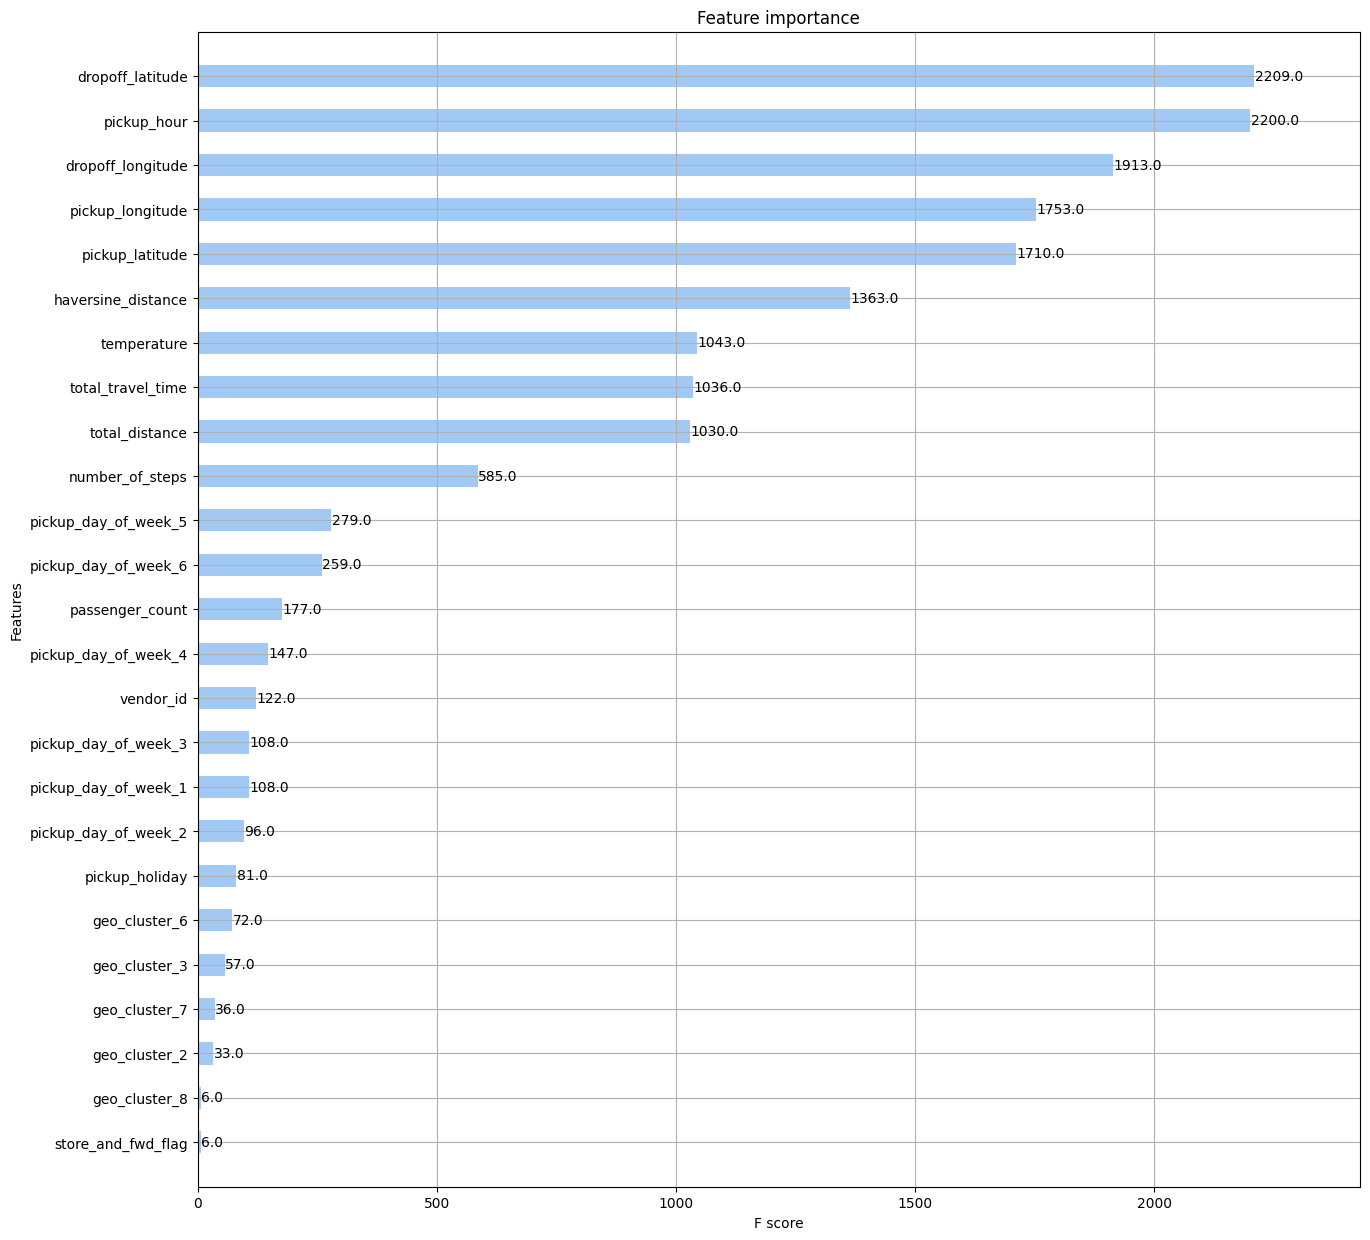

In [114]:
fig, ax = plt.subplots(figsize = (15,15))
xgb.plot_importance(model, ax = ax, height=0.5)